In [76]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt


In [77]:
data=np.loadtxt('1-forces_stress100_vf_0.72edited.txt')

In [78]:
def get_dic_from_two_lists(keys, values):
    return { keys[i] : values[i] for i in range(len(keys)) }

pos=get_dic_from_two_lists(r_lis,poss)
#print((pos))

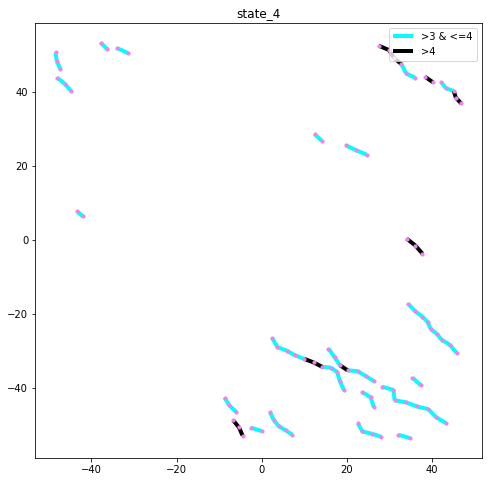

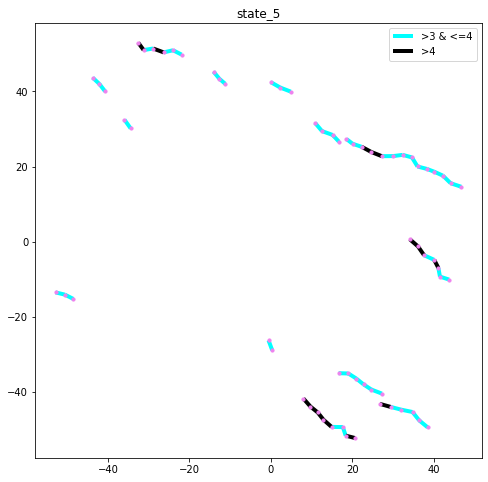

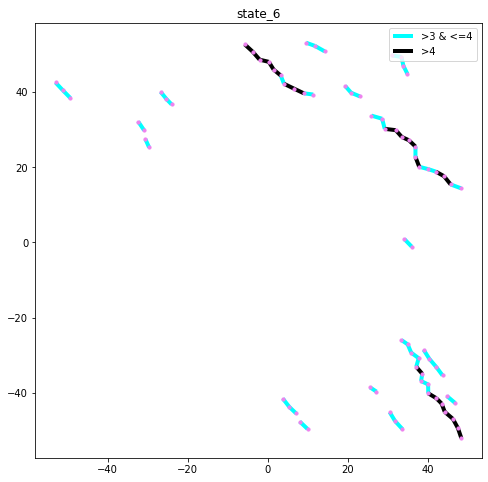

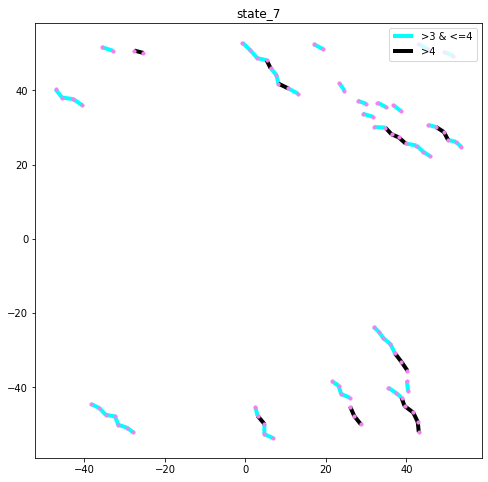

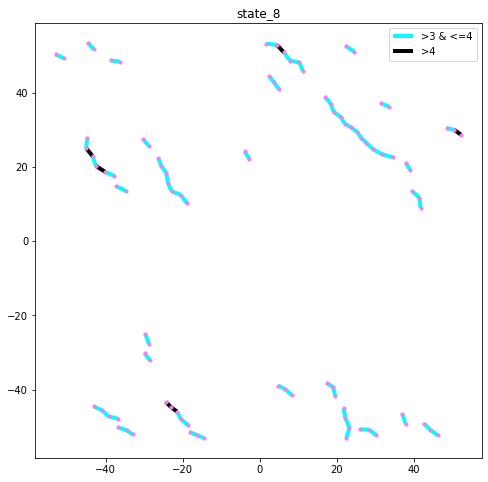

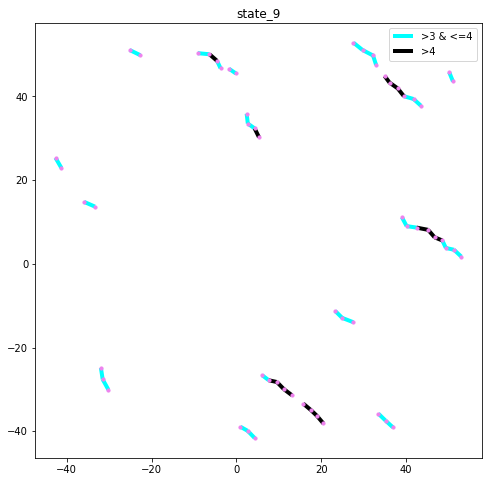

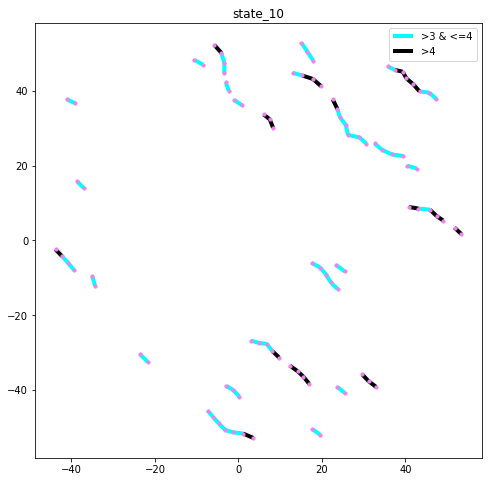

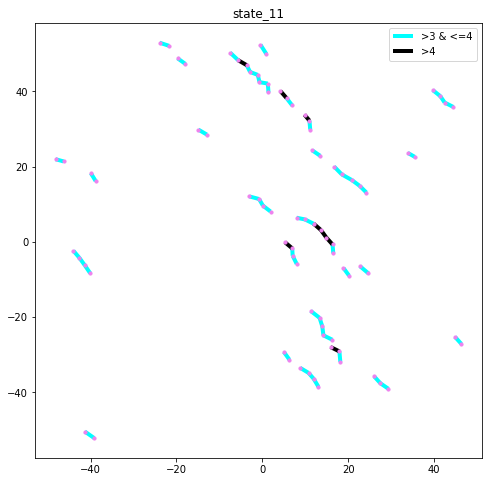

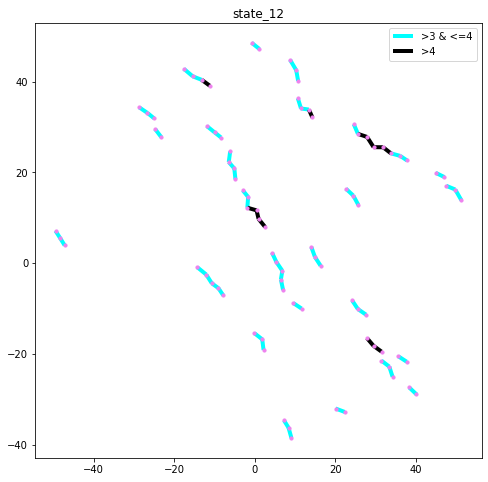

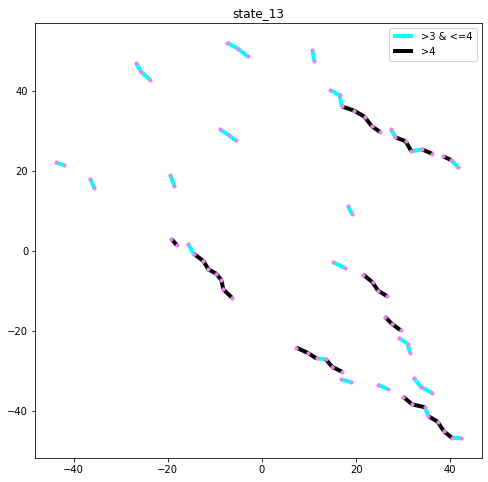

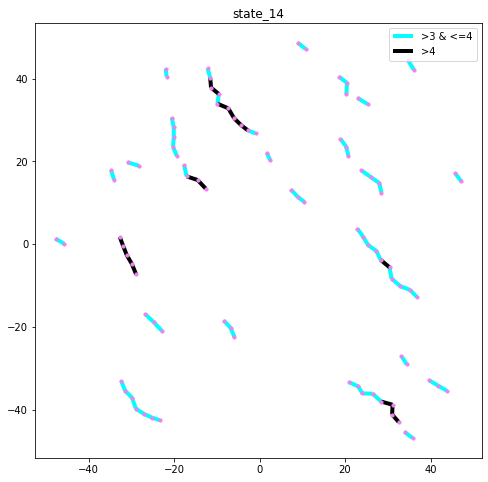

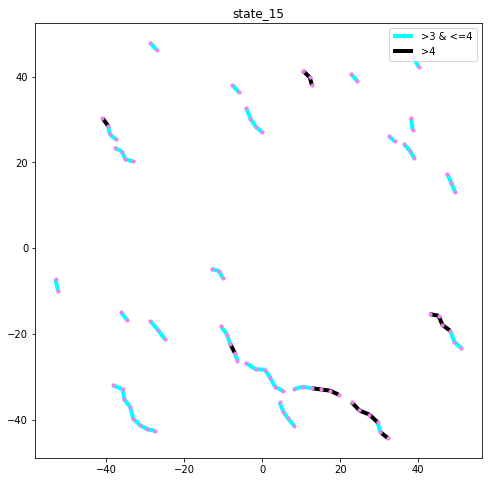

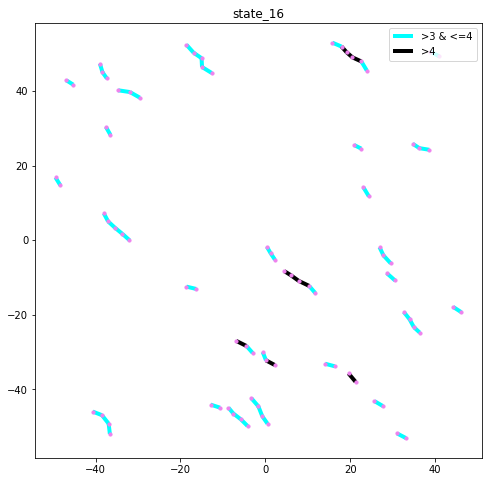

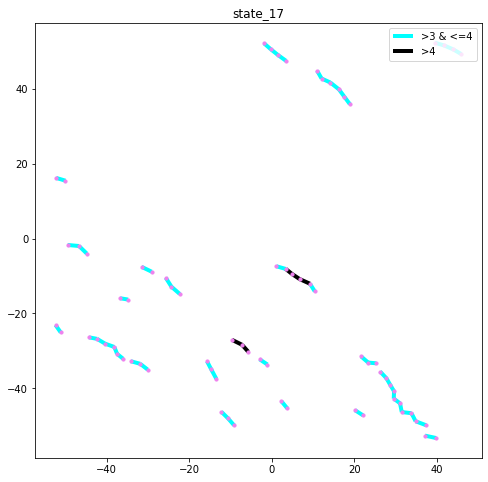

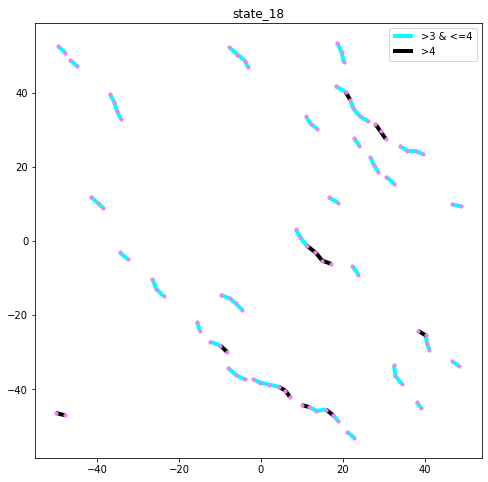

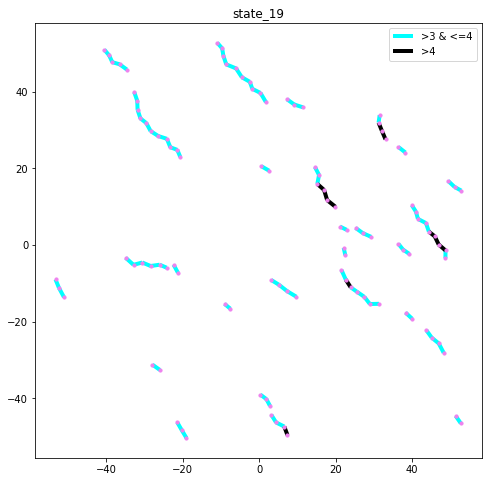

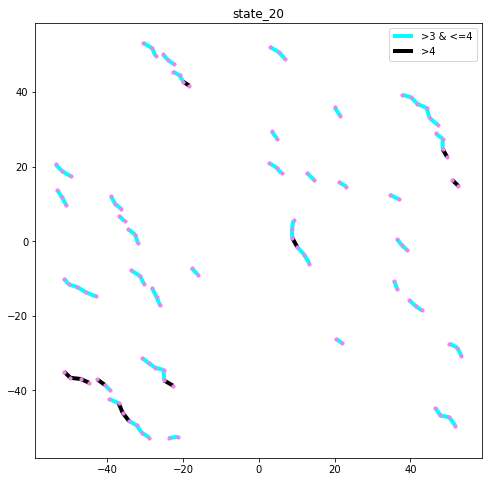

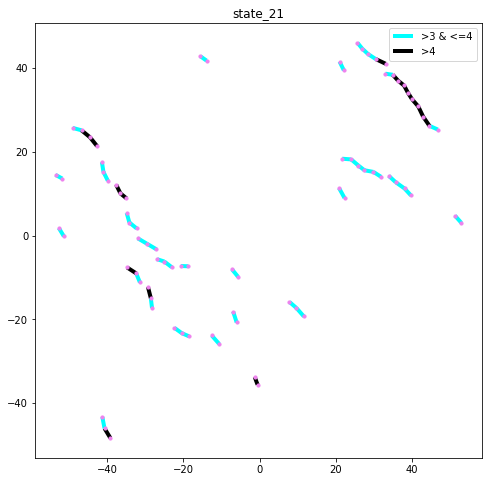

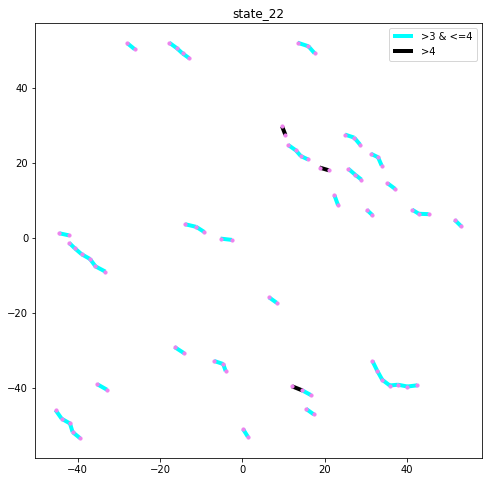

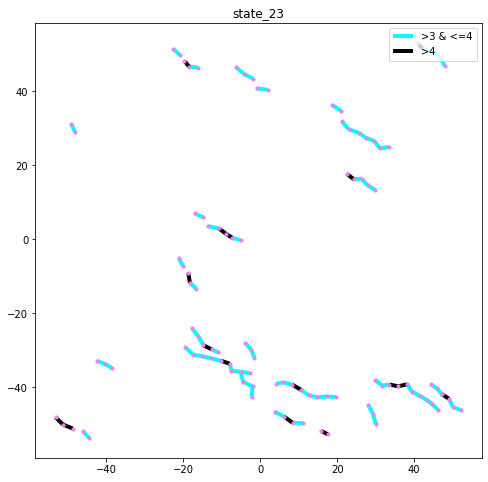

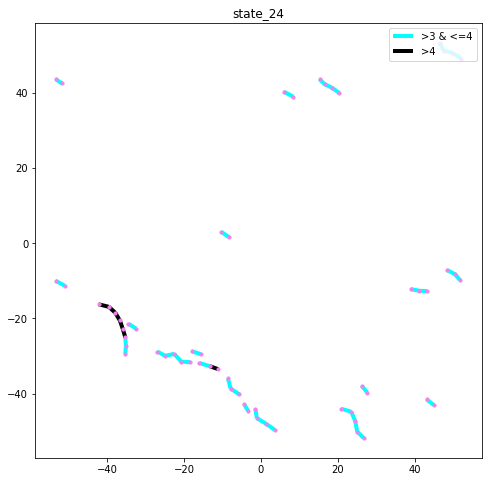

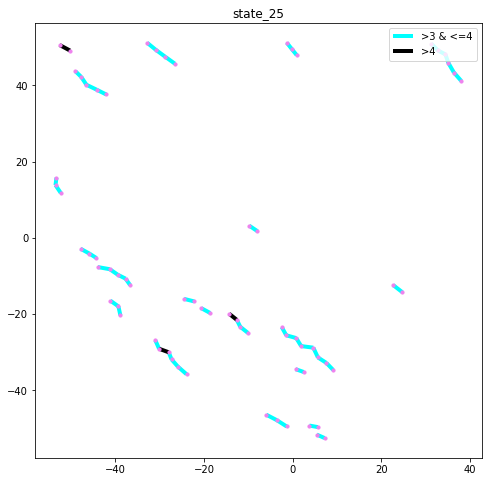

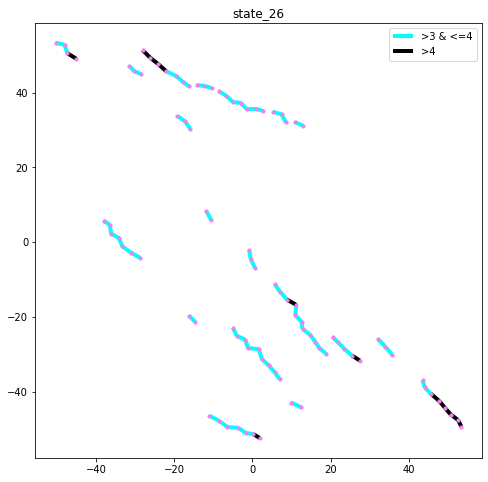

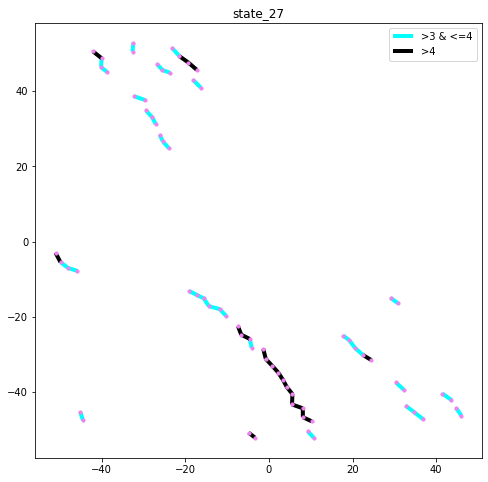

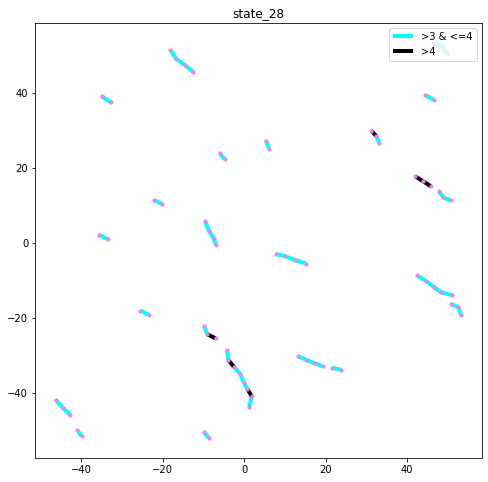

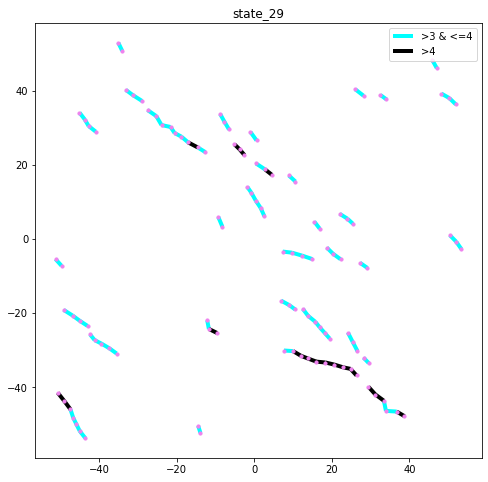

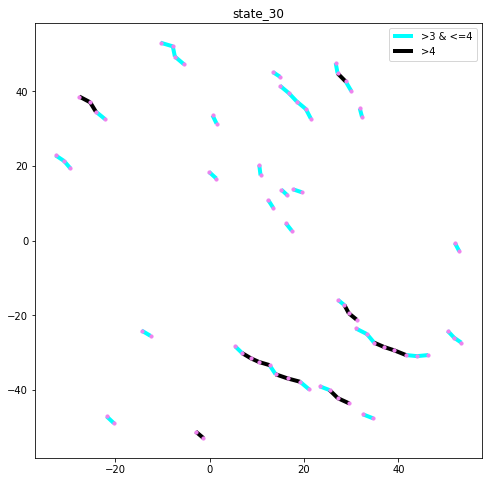

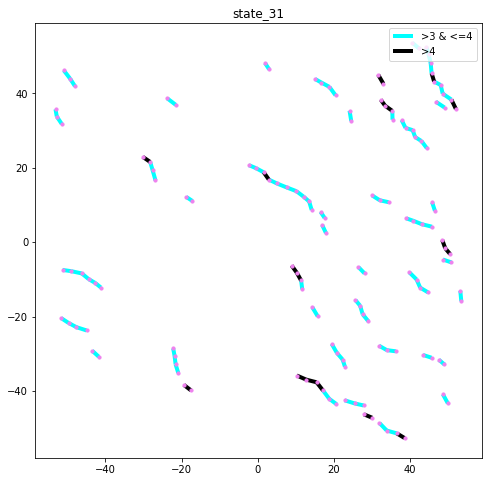

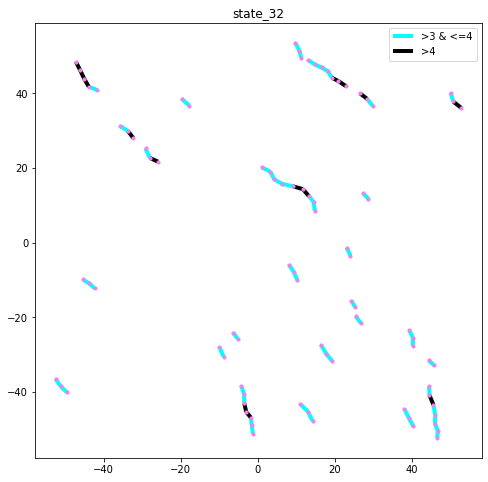

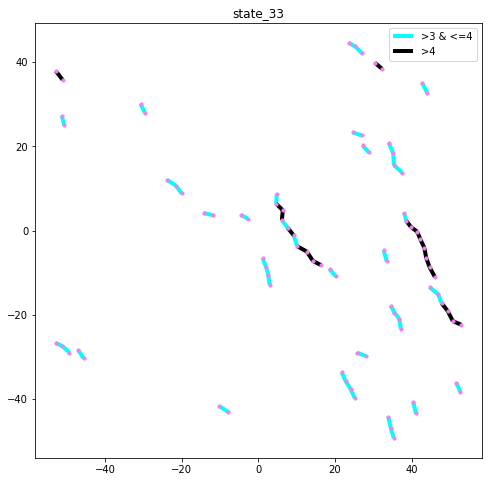

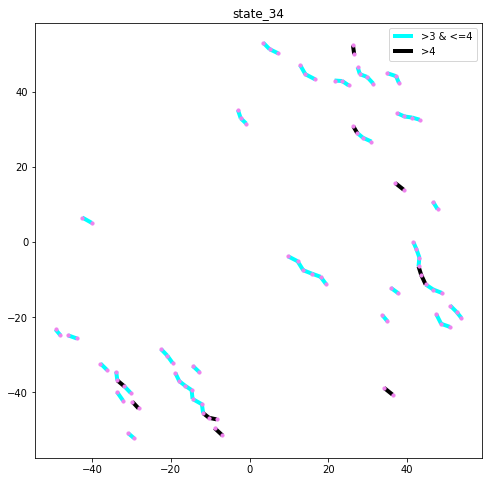

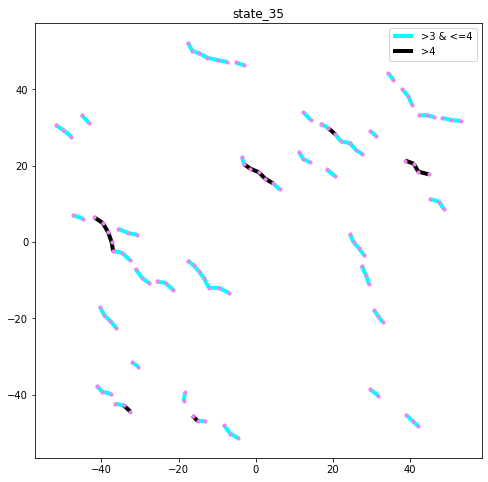

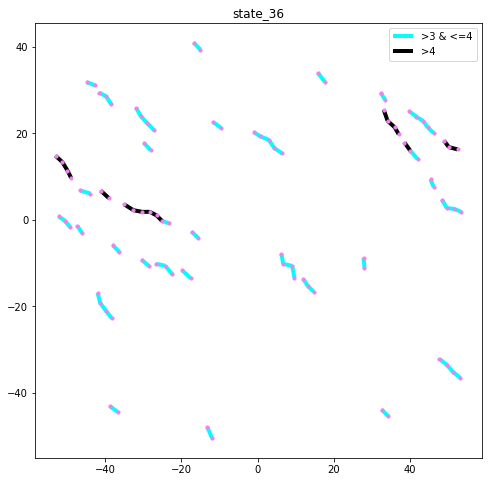

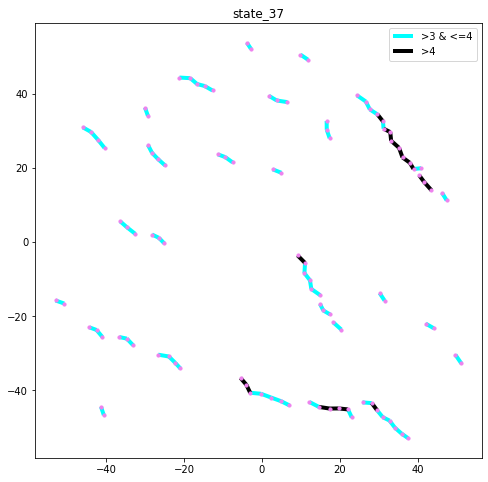

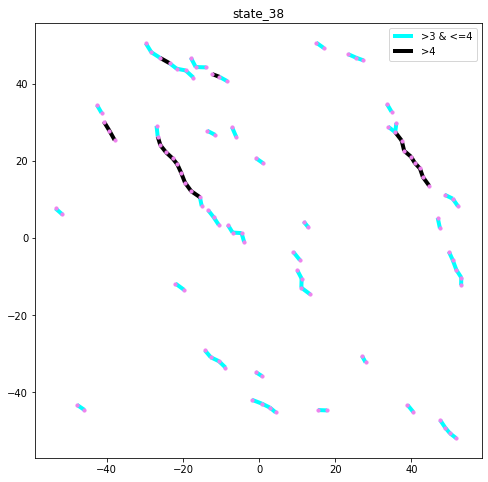

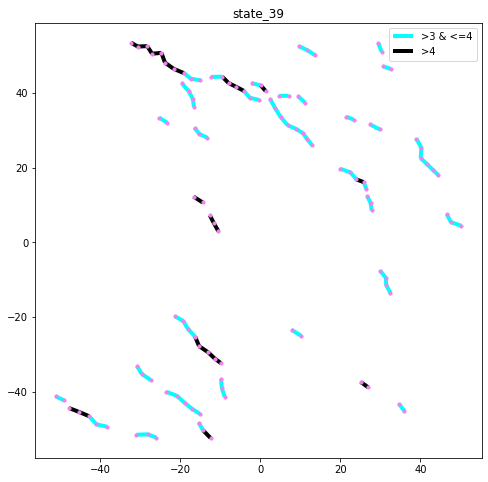

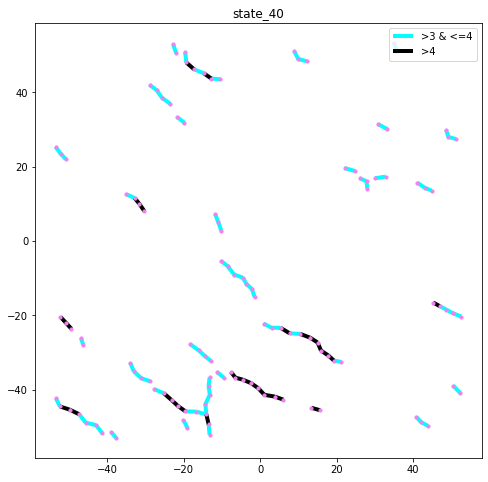

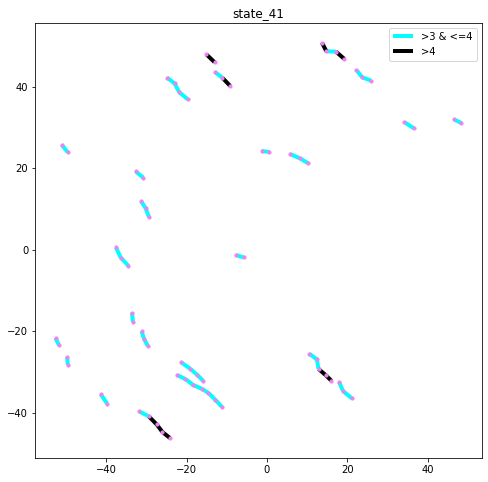

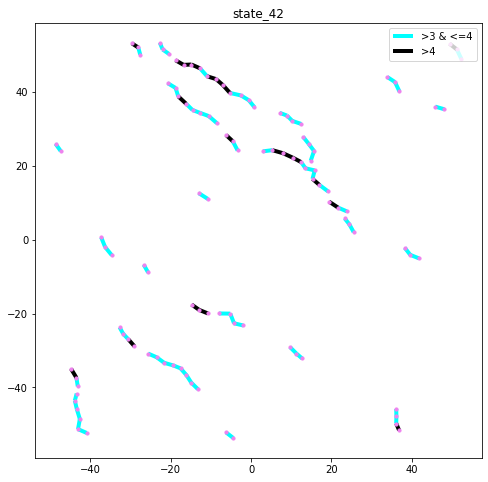

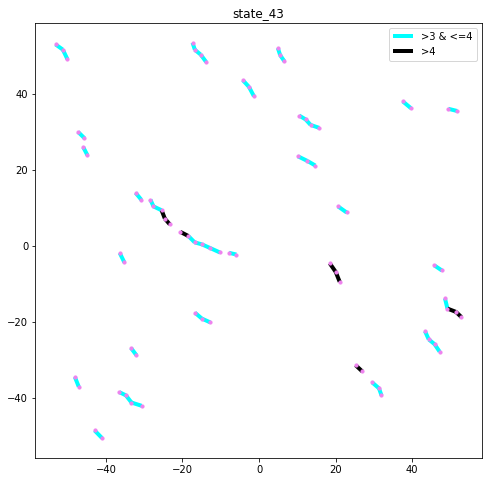

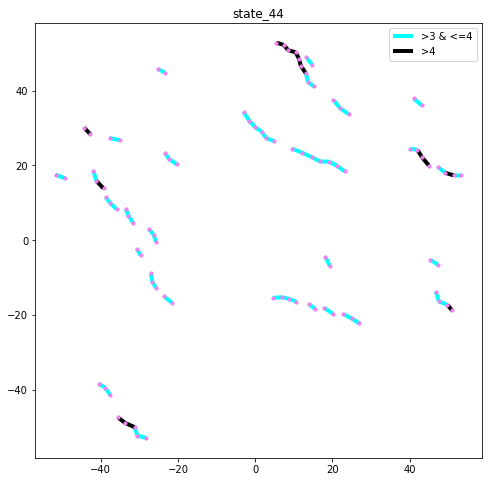

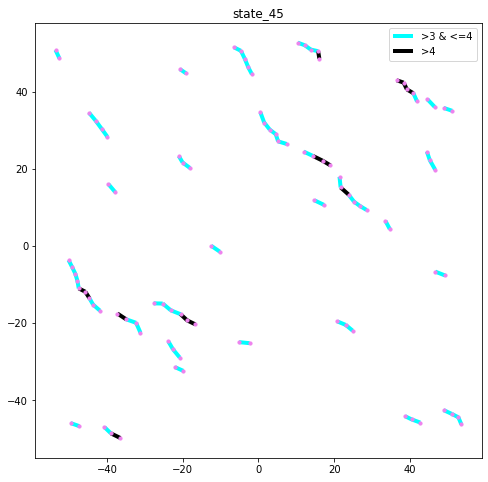

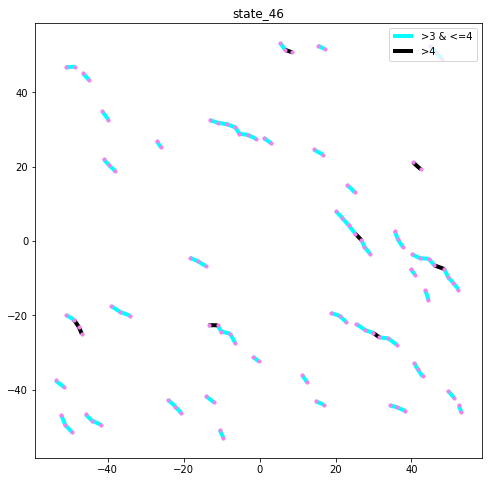

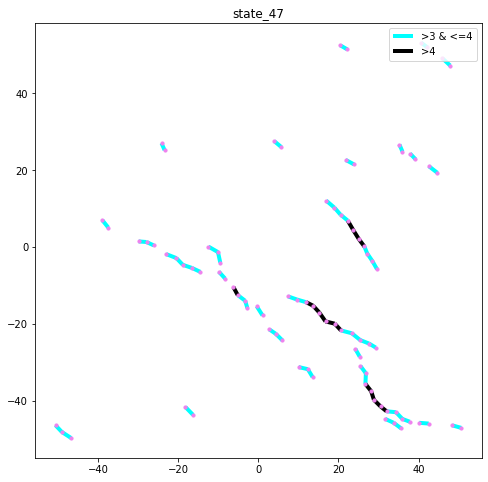

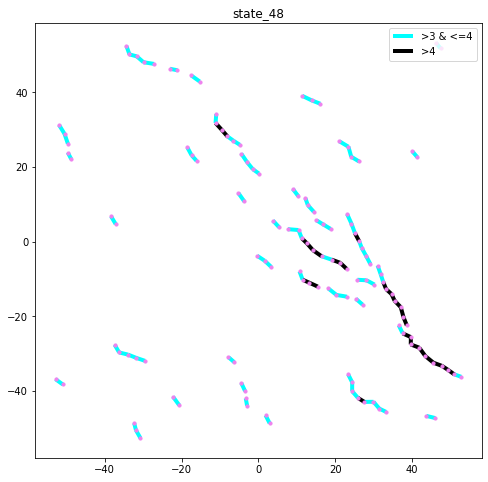

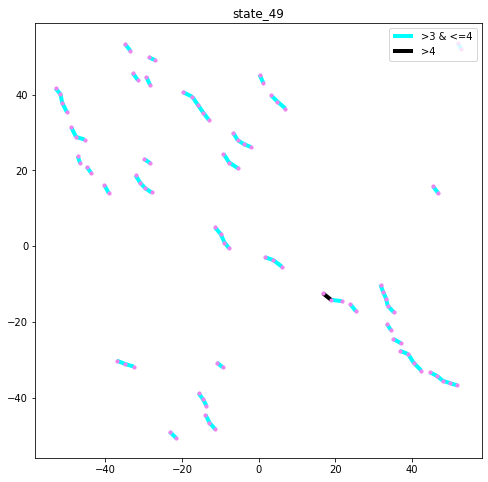

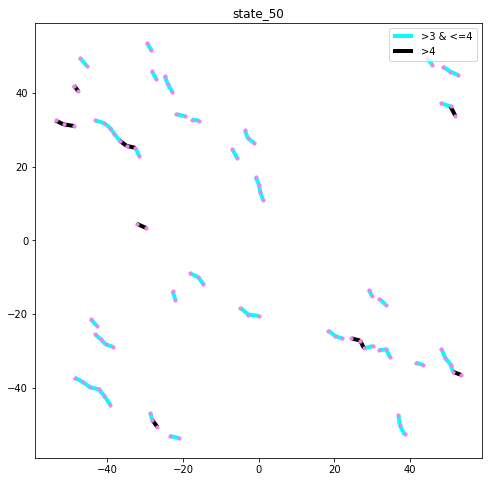

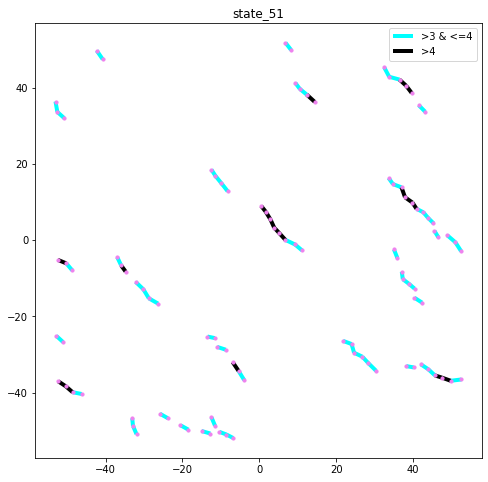

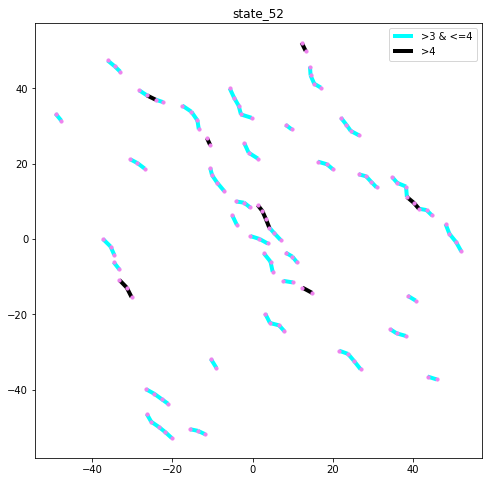

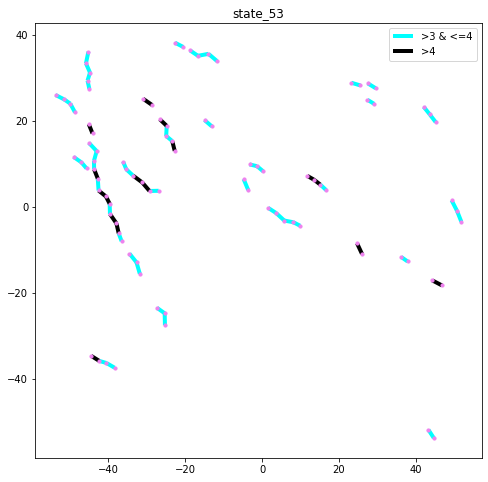

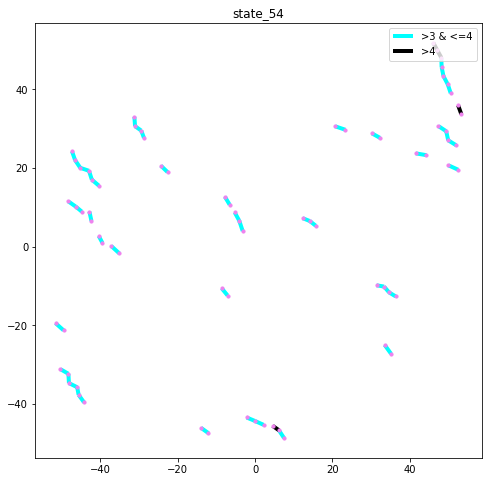

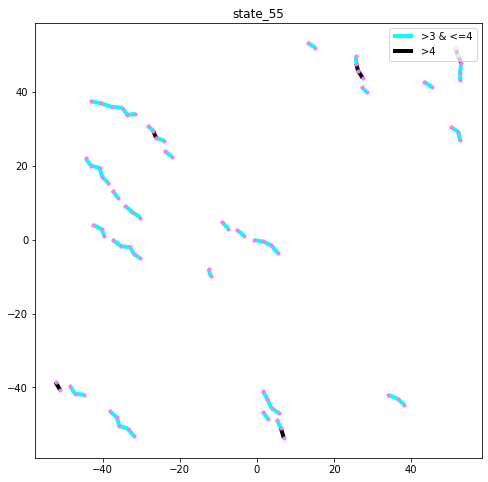

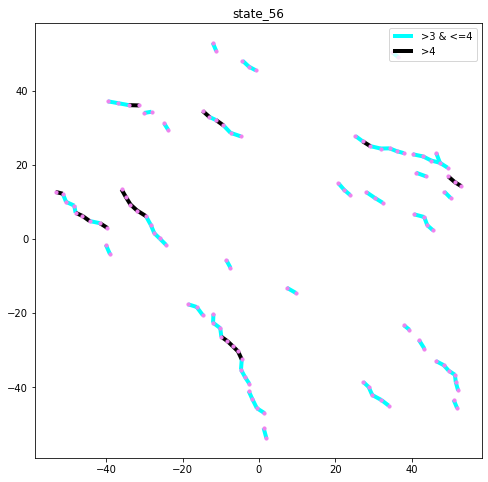

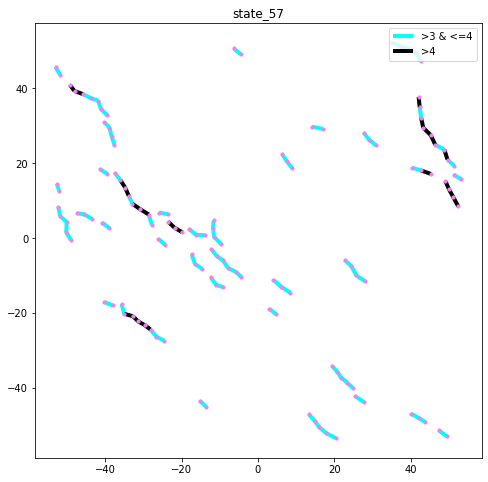

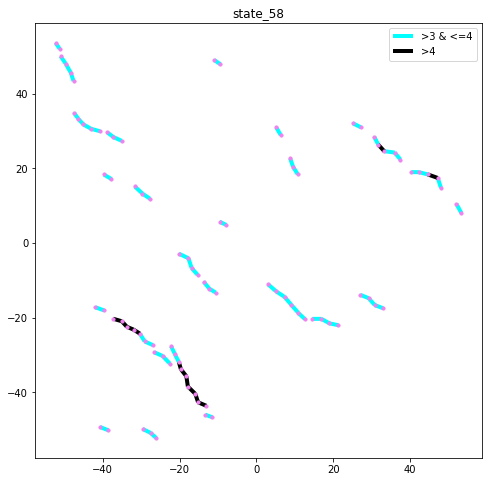

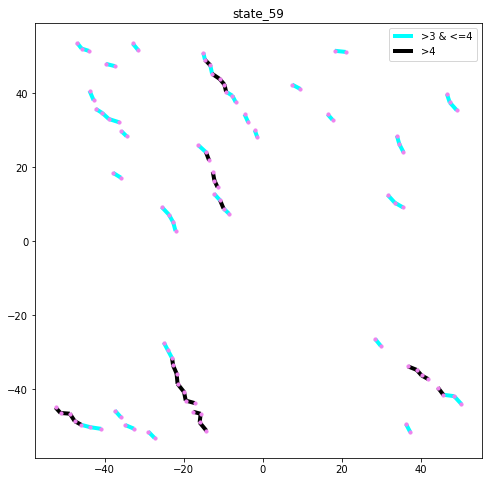

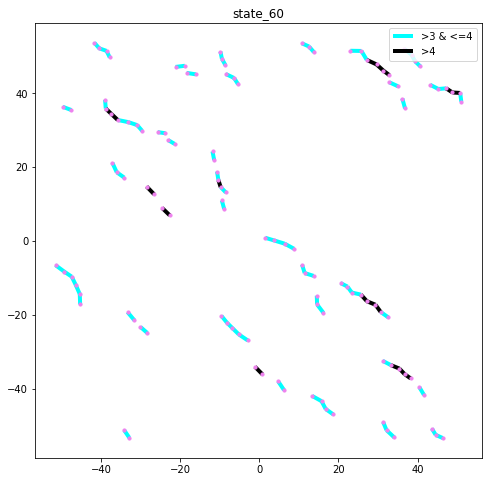

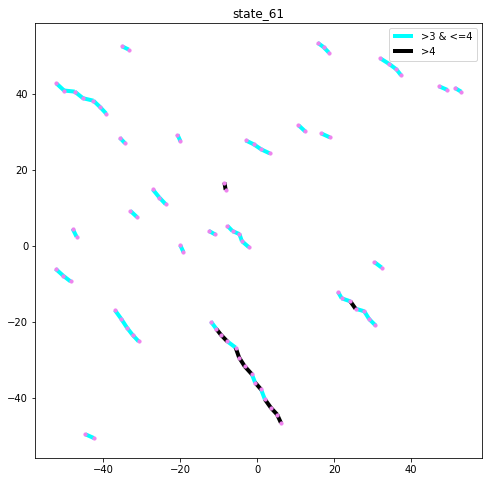

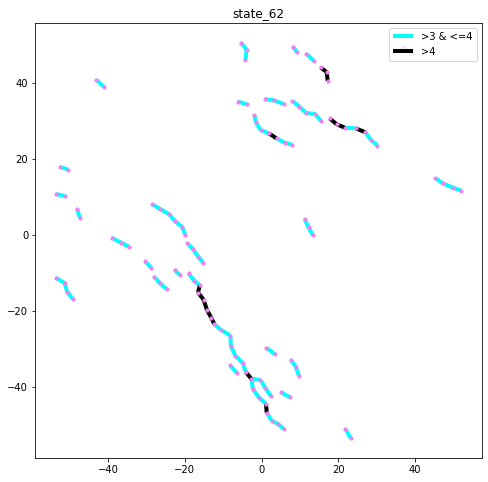

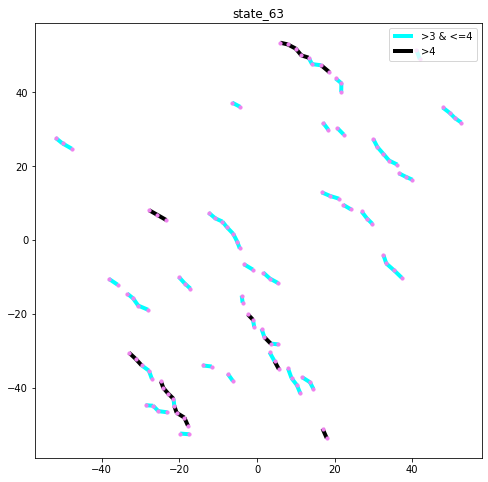

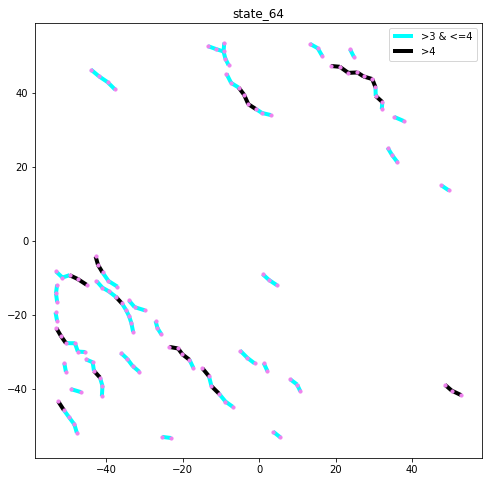

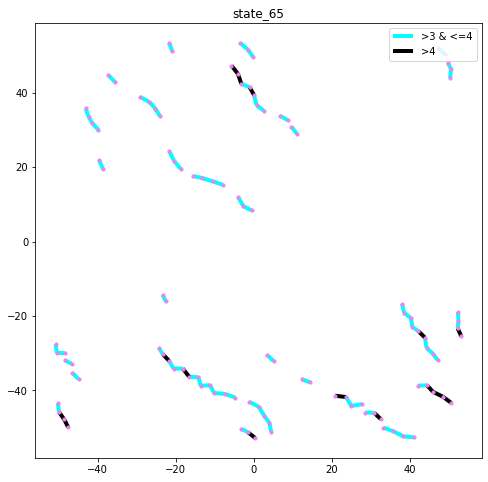

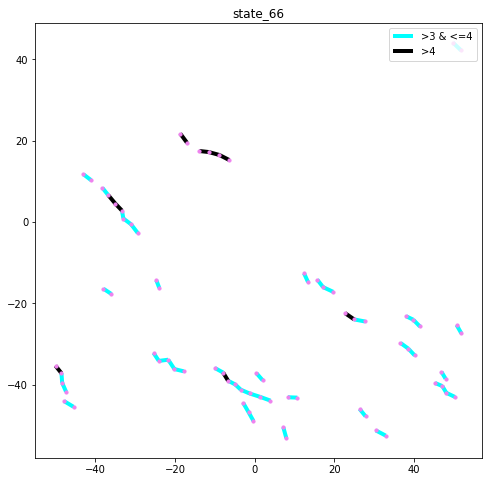

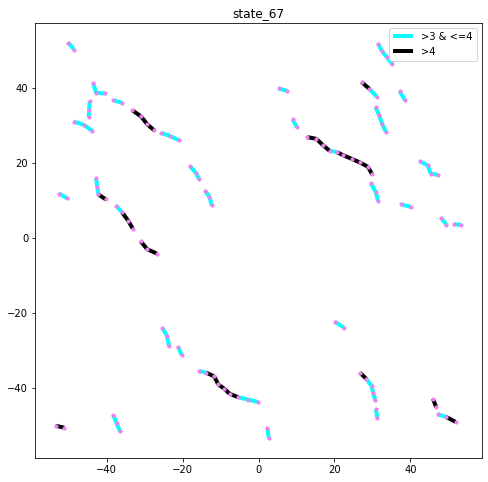

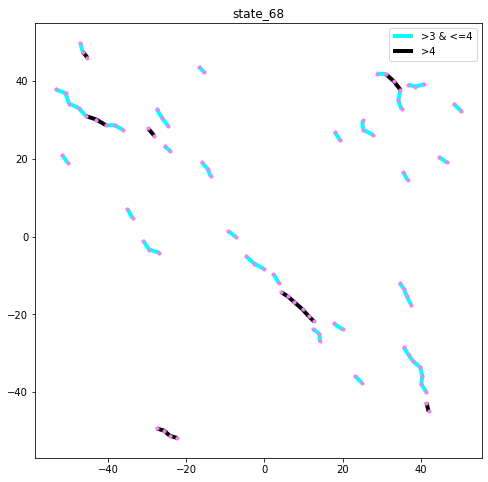

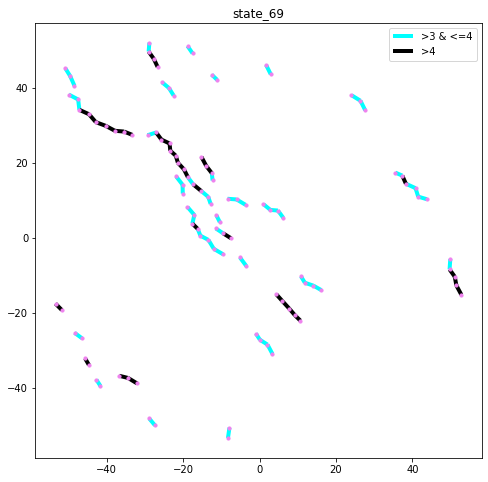

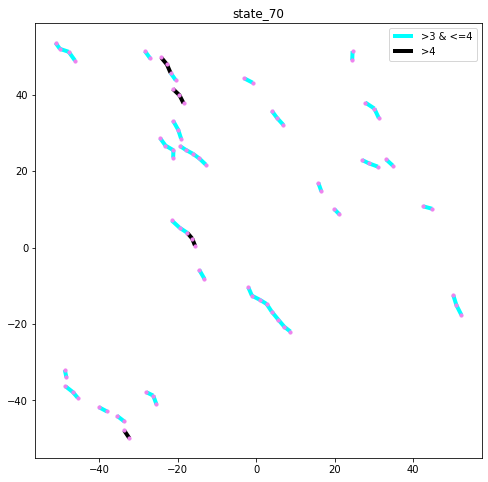

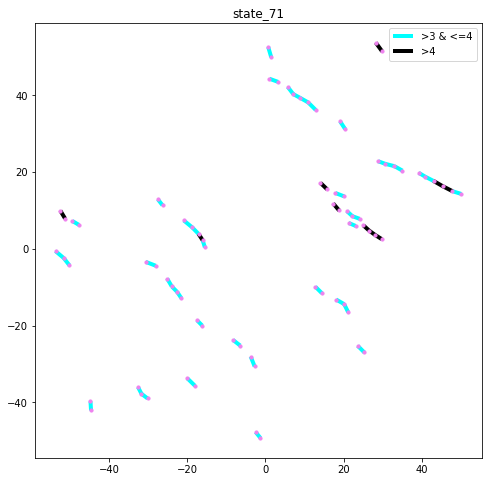

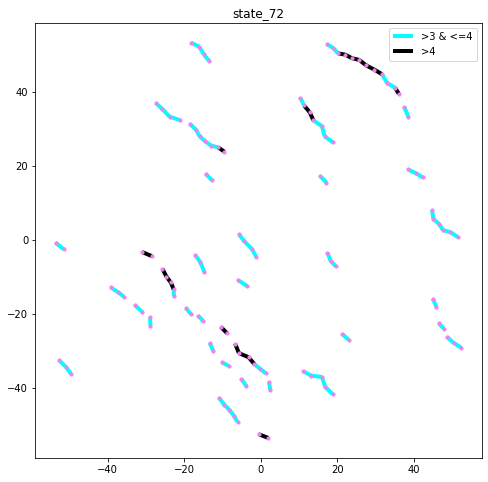

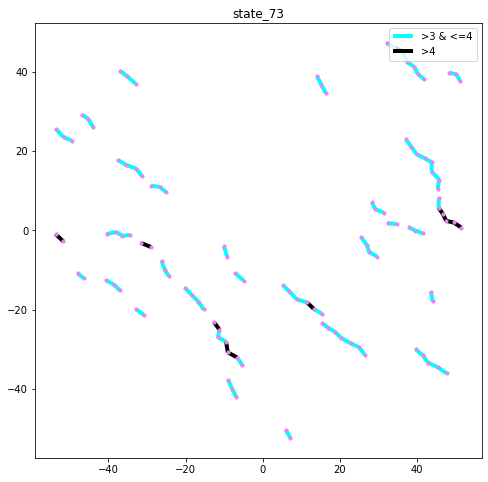

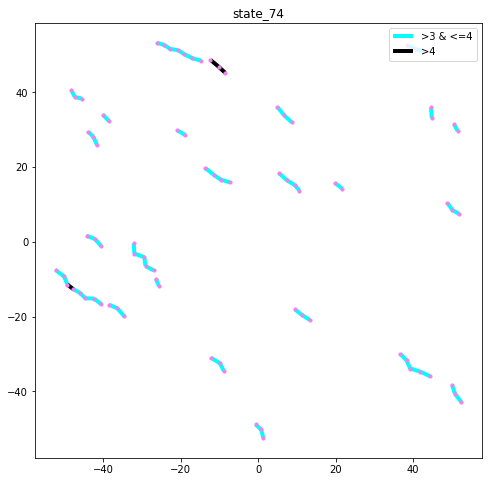

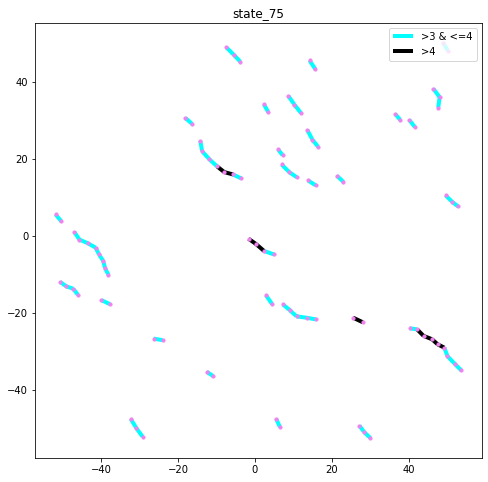

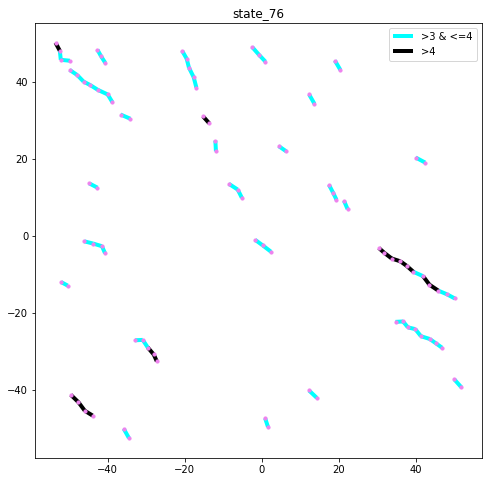

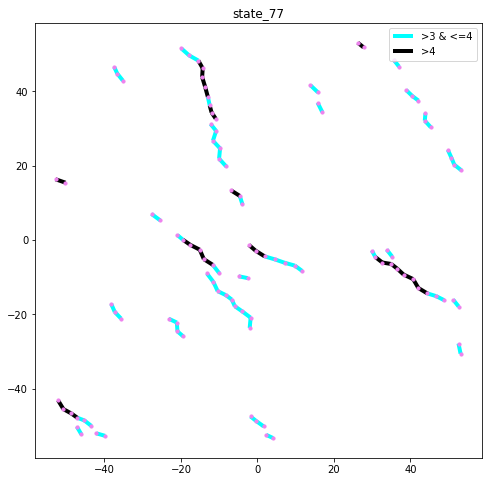

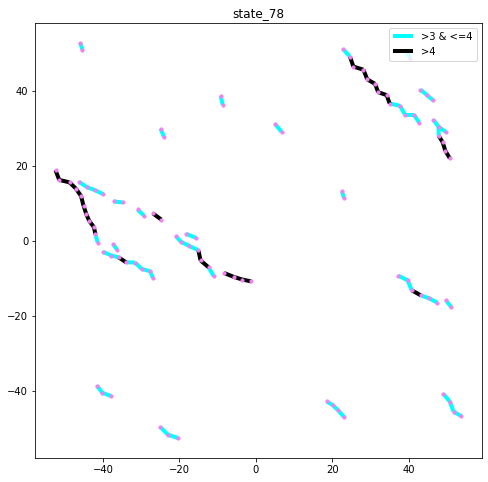

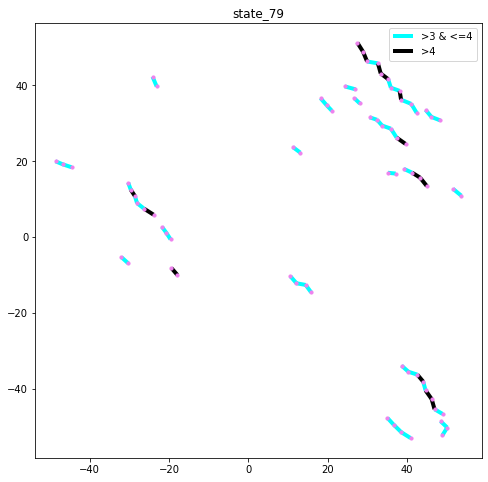

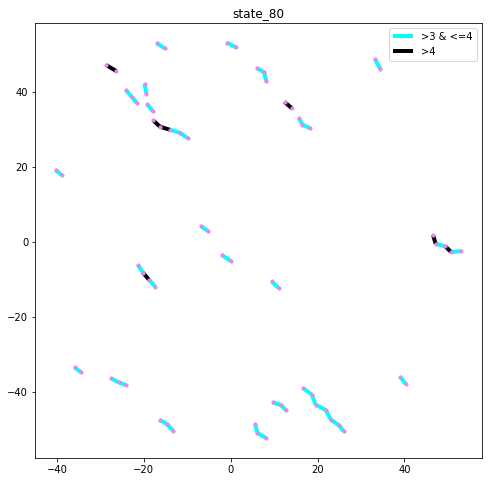

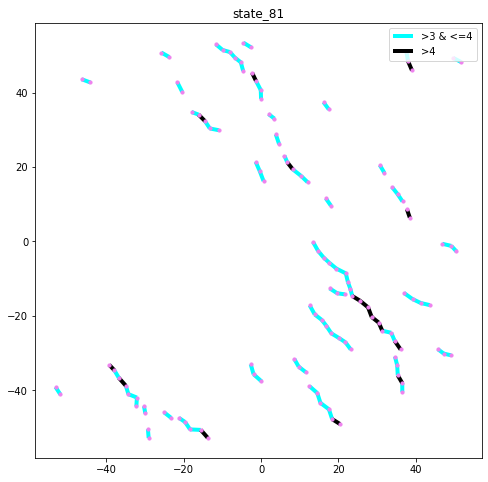

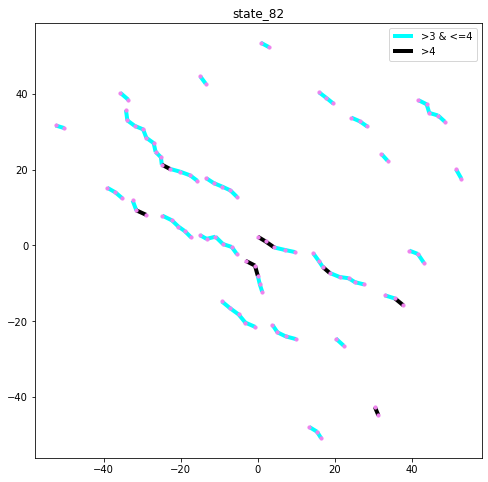

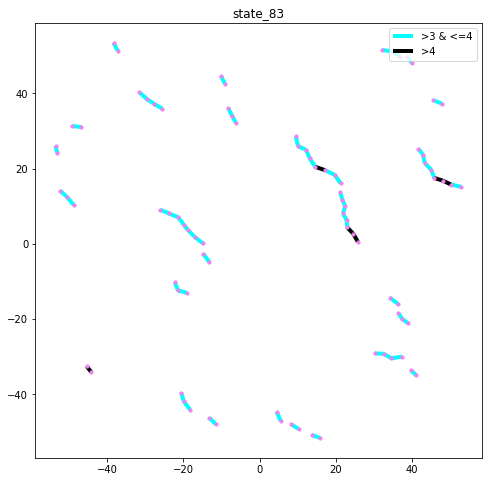

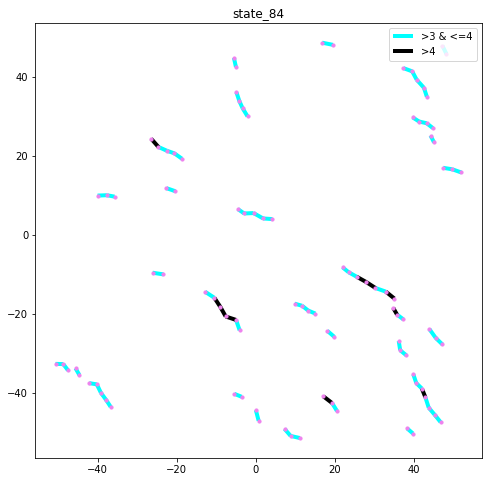

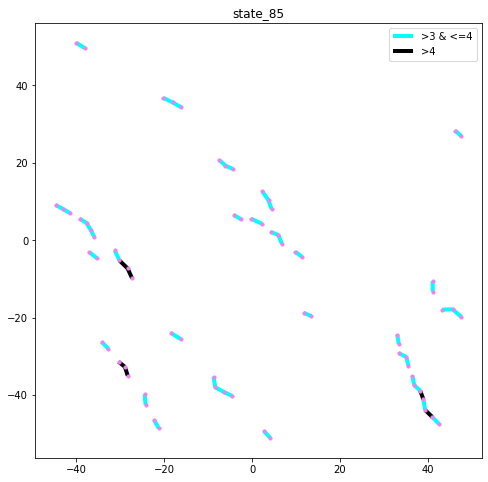

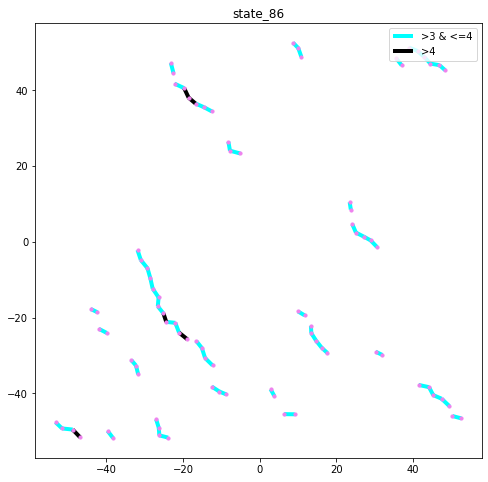

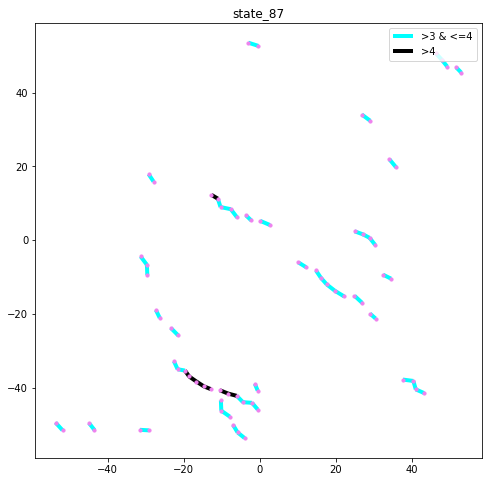

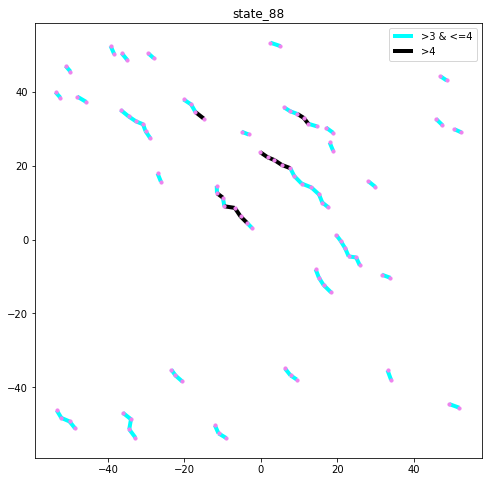

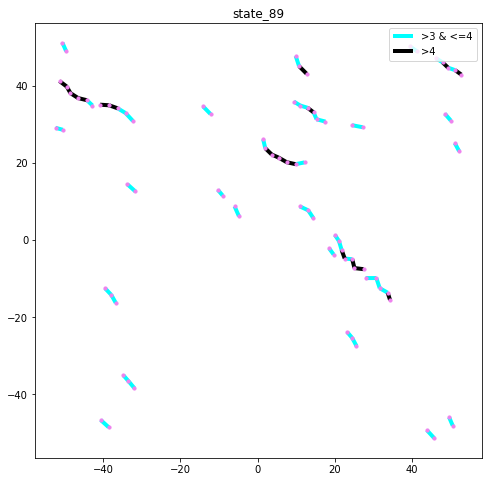

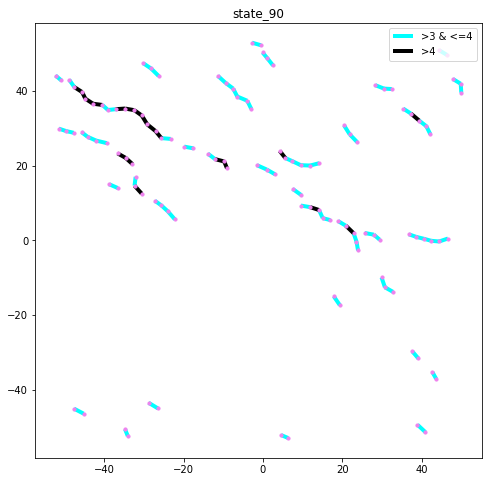

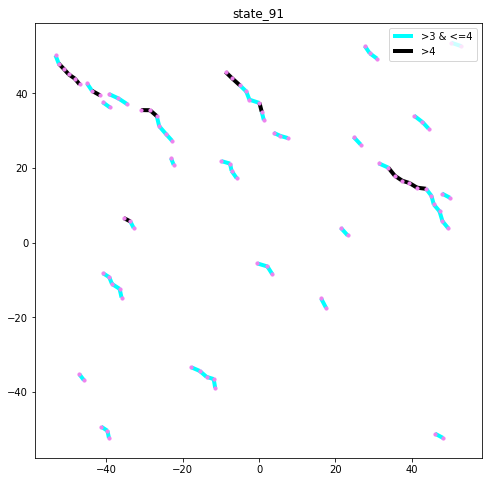

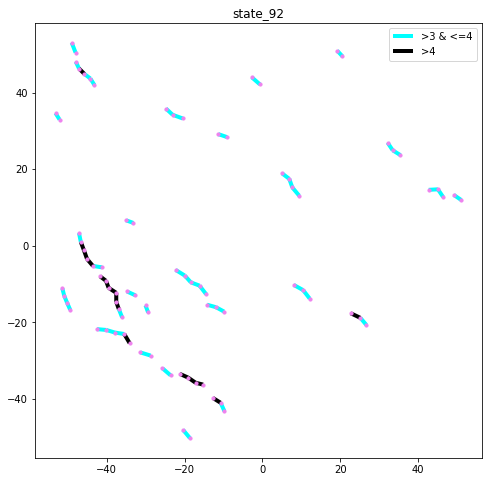

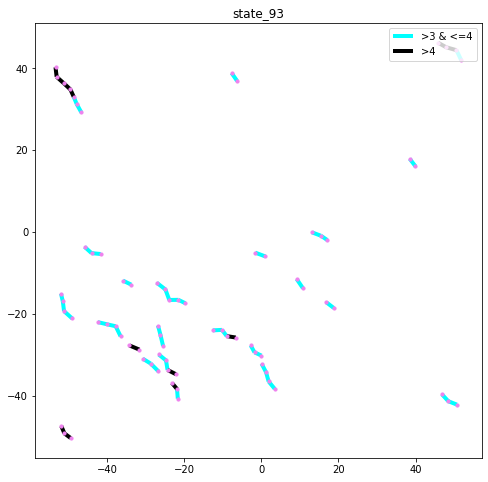

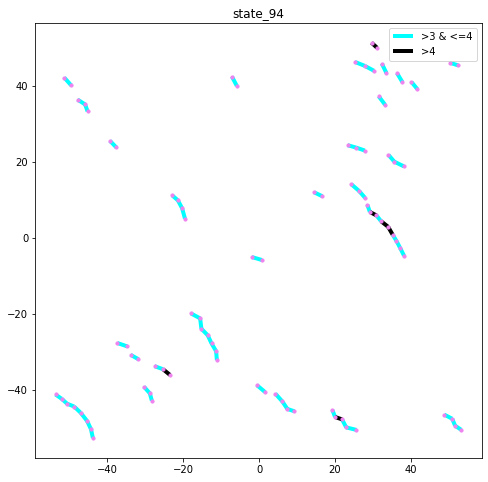

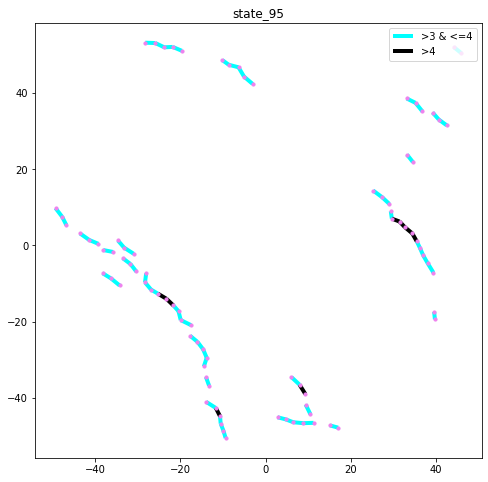

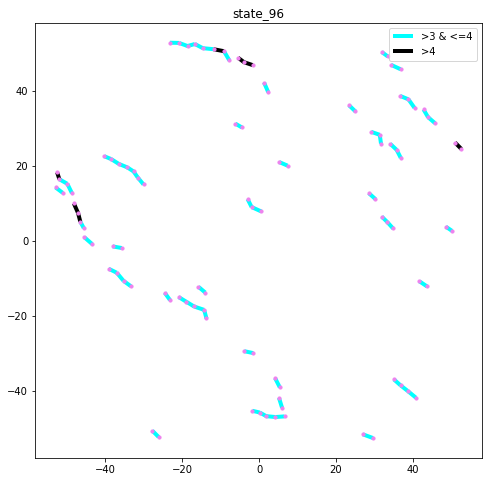

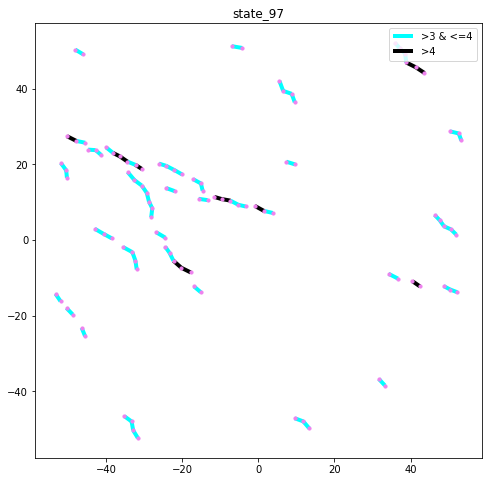

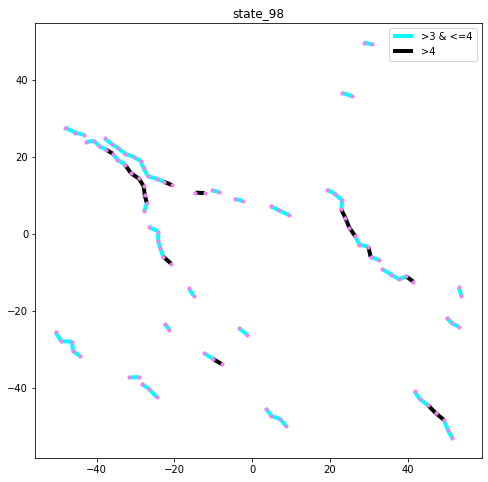

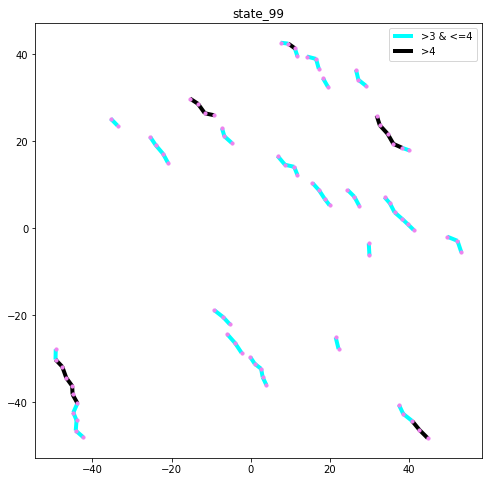

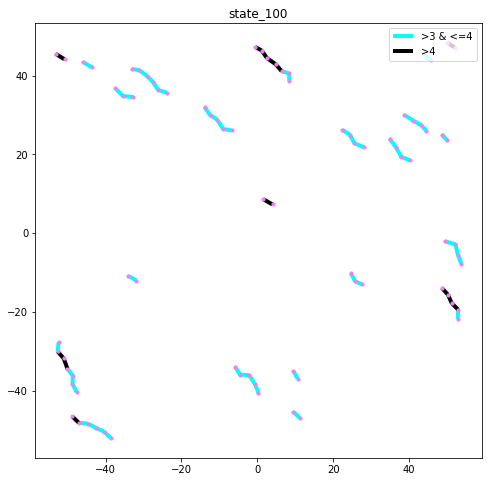

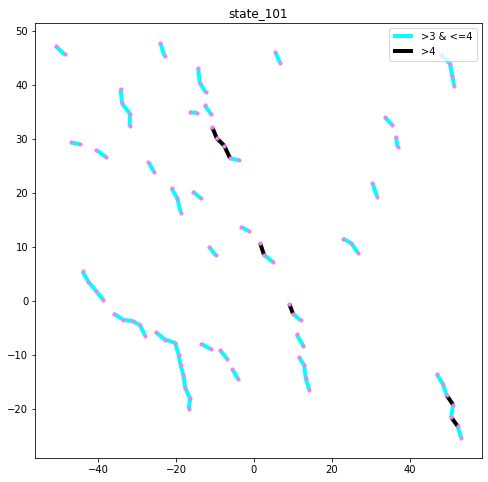

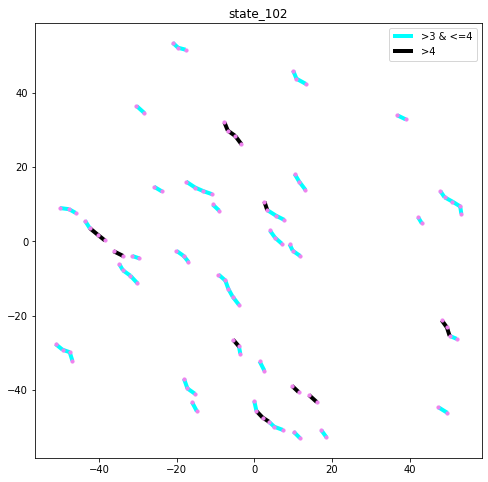

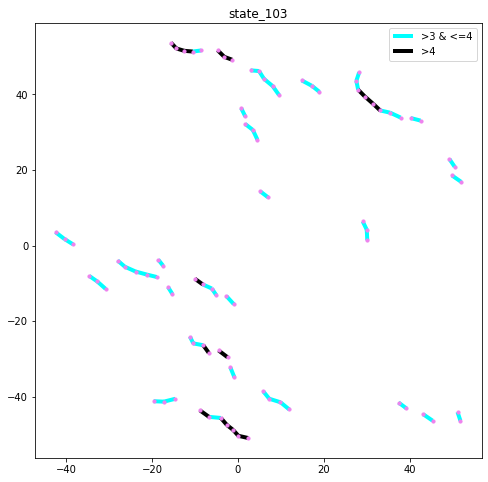

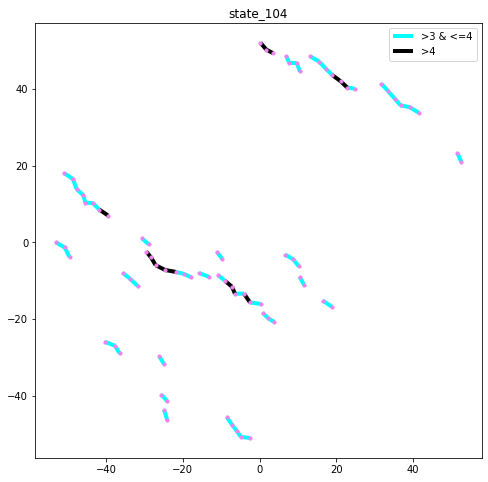

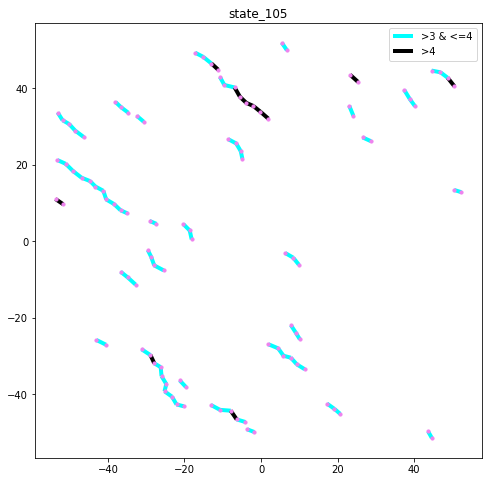

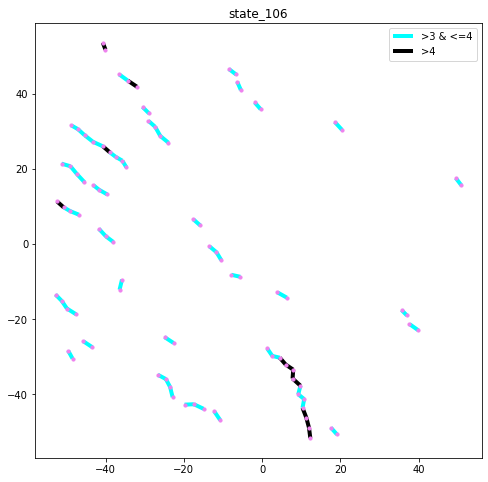

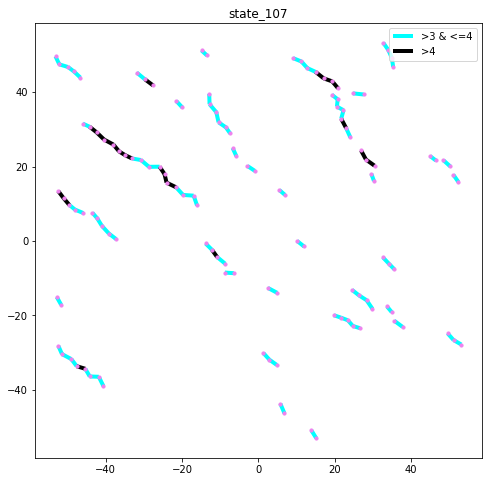

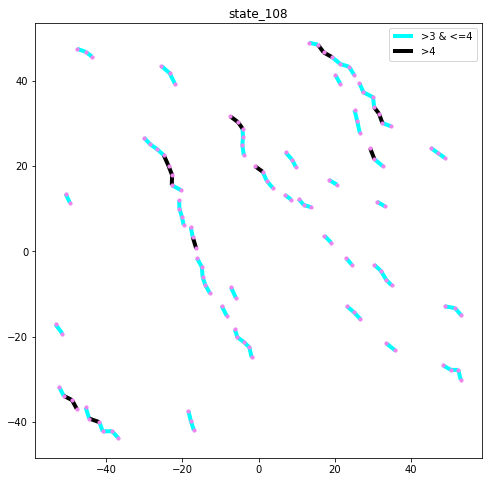

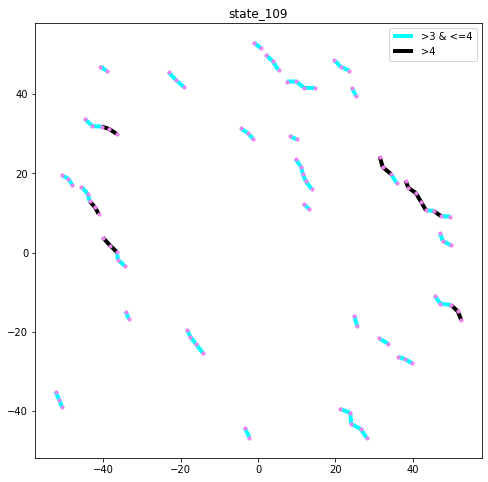

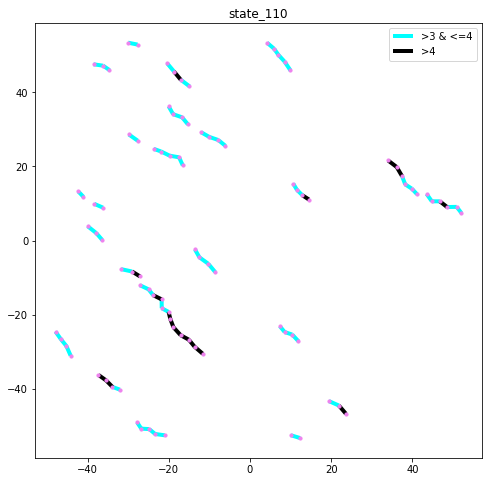

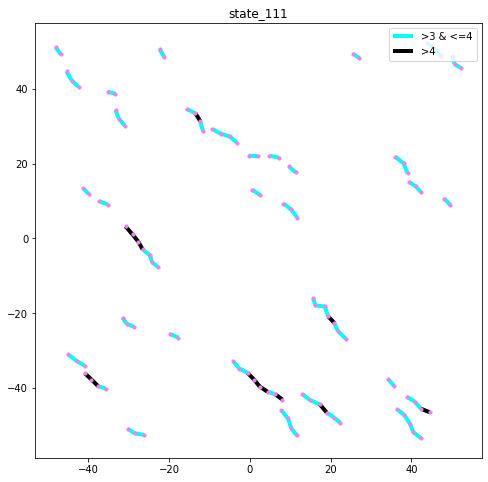

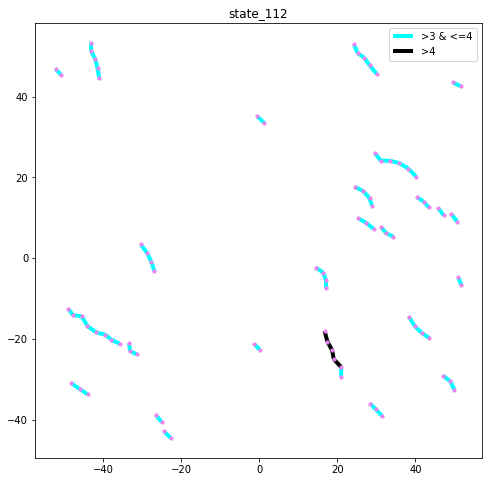

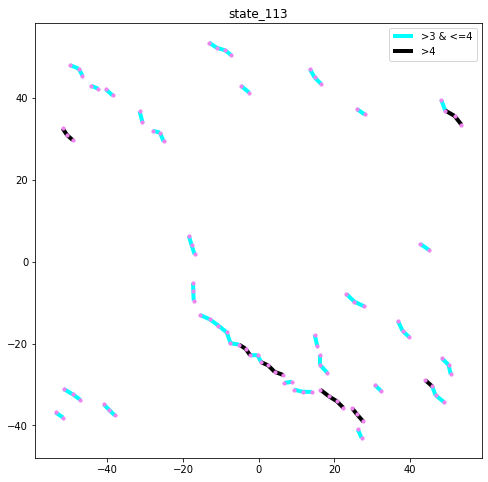

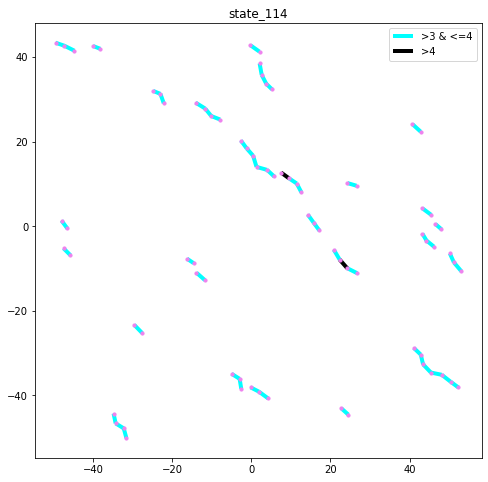

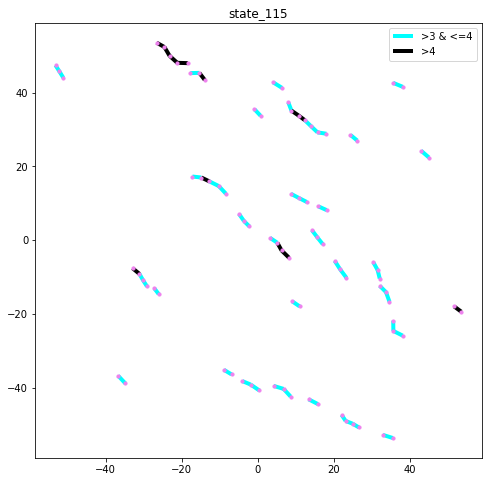

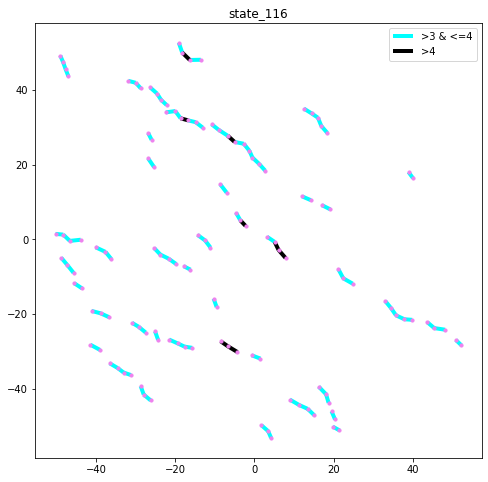

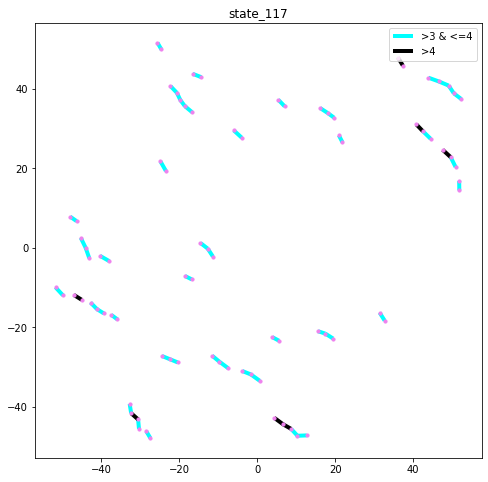

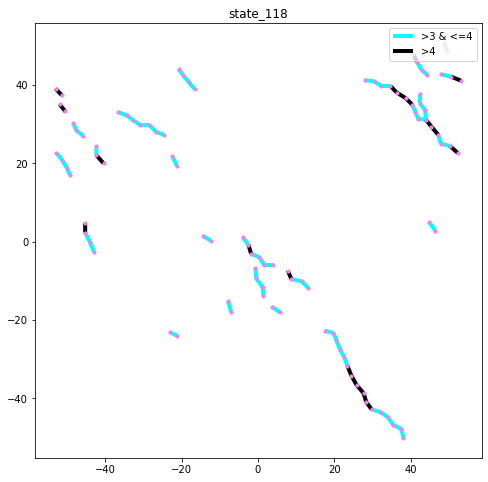

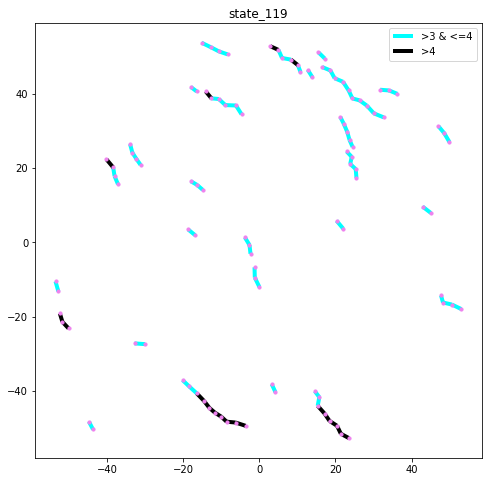

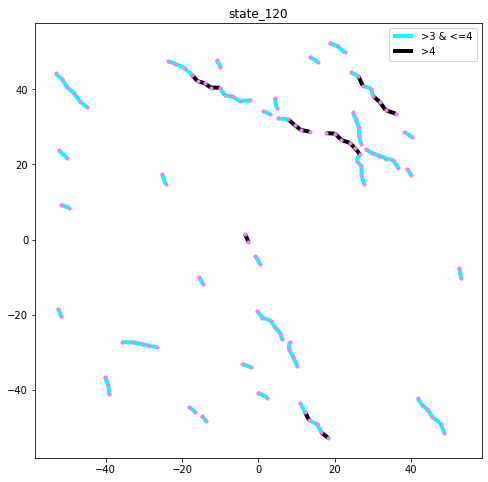

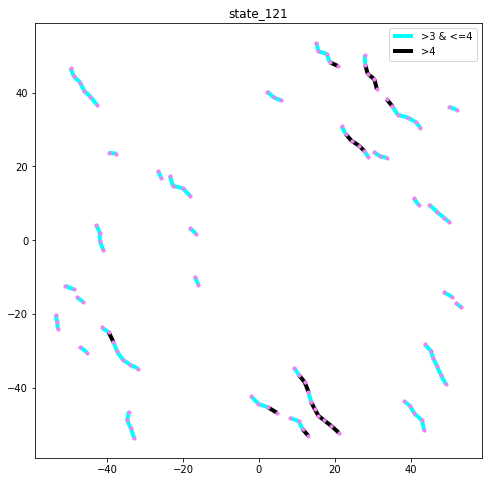

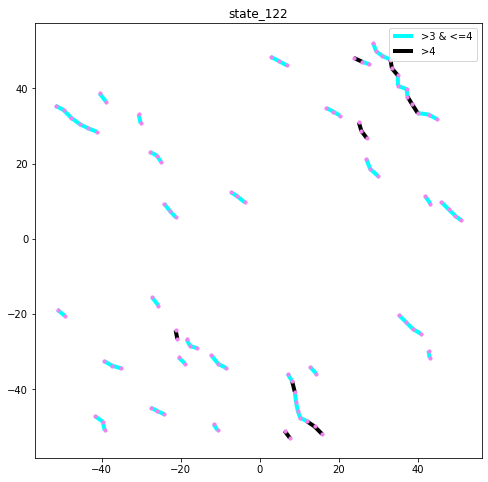

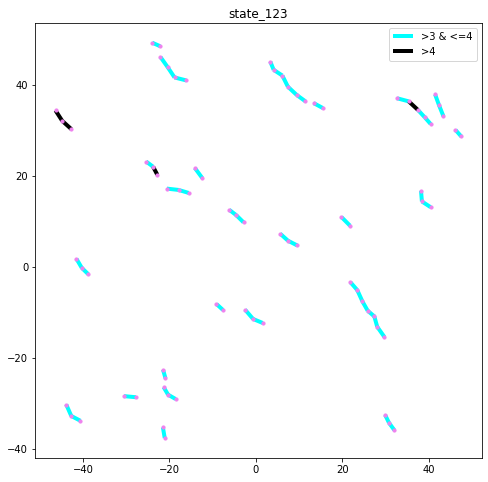

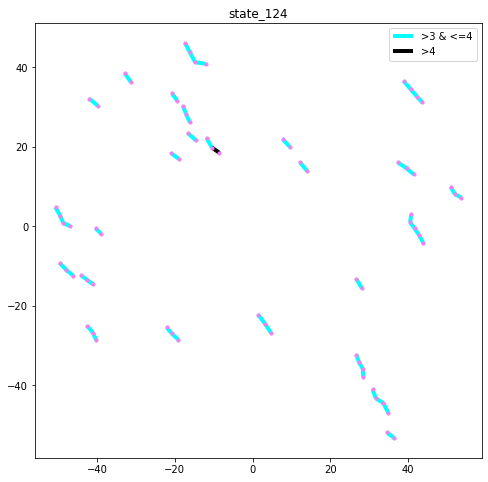

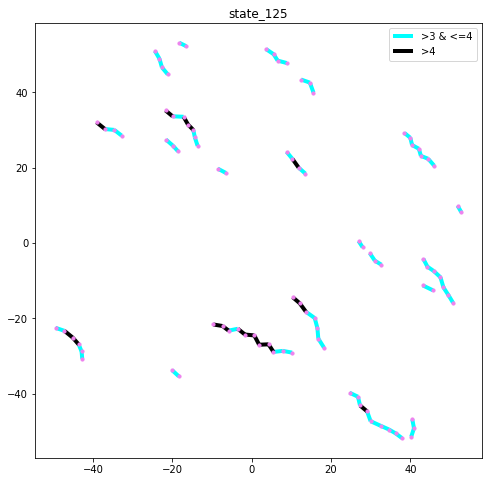

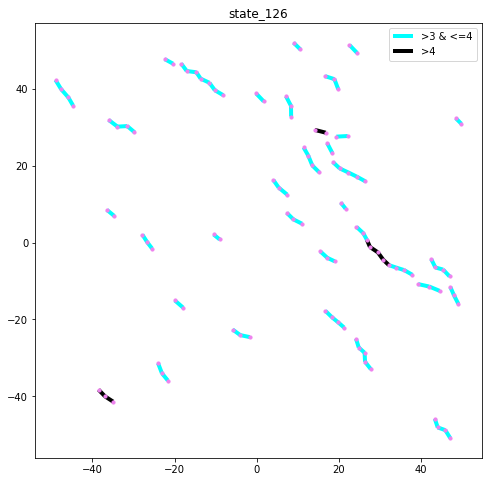

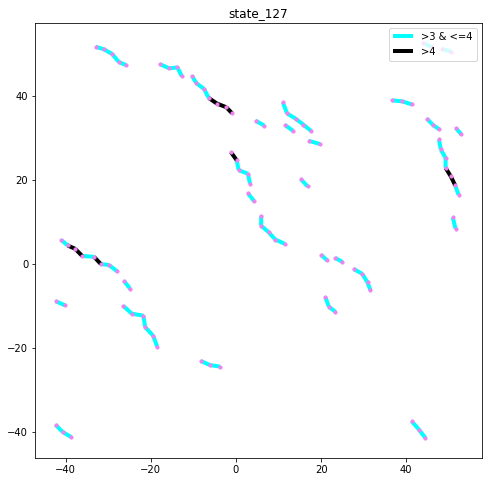

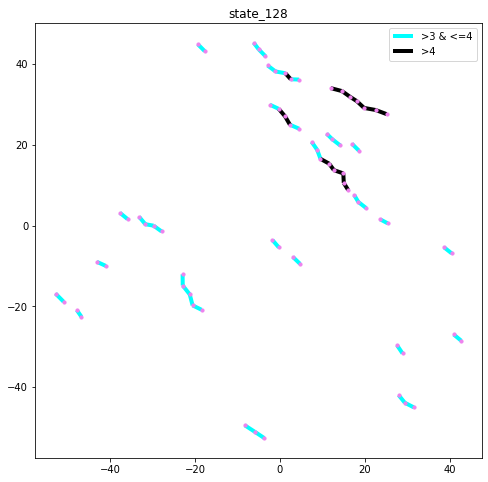

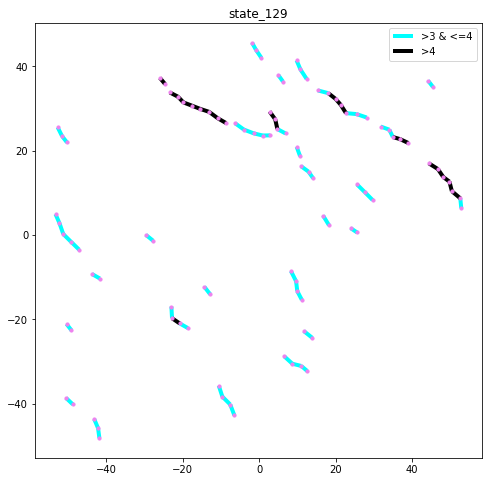

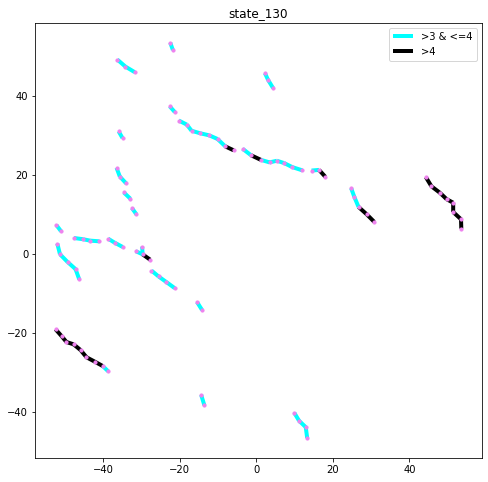

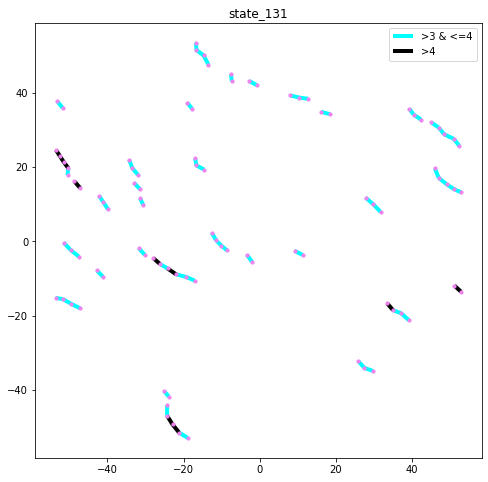

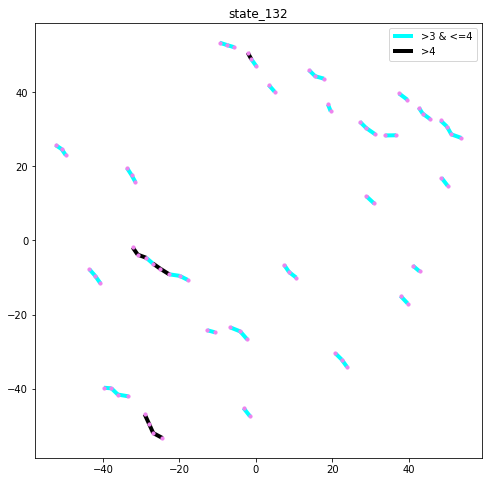

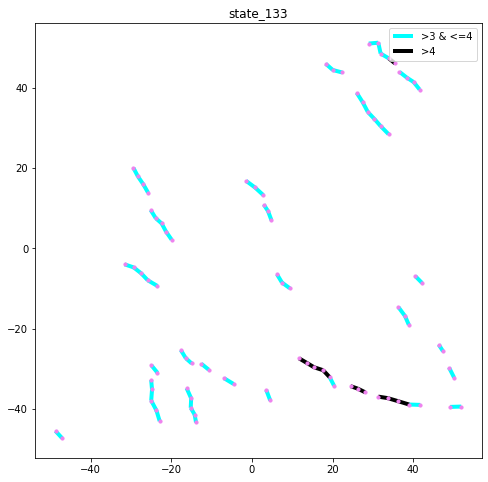

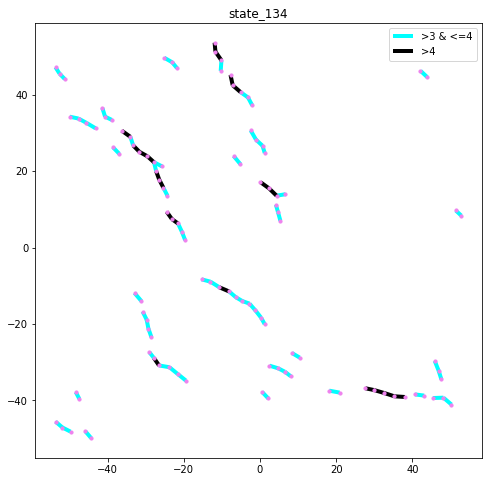

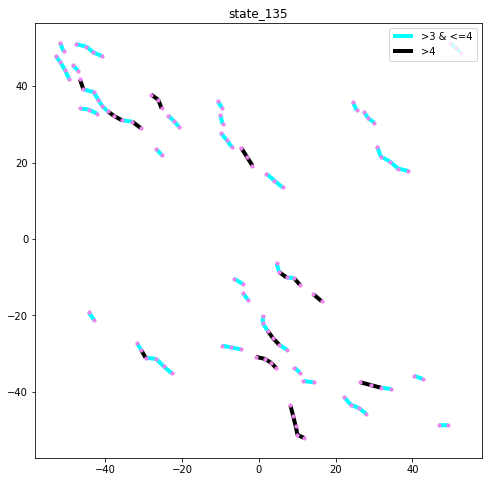

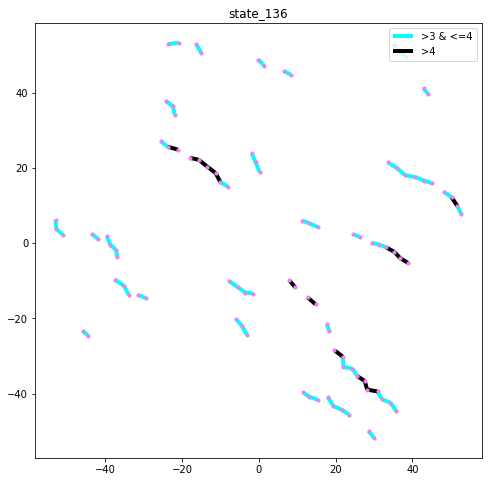

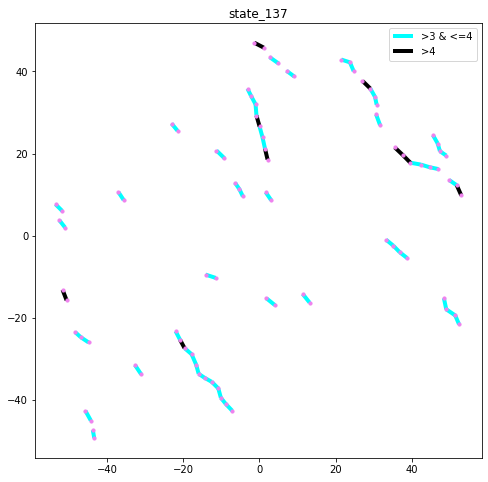

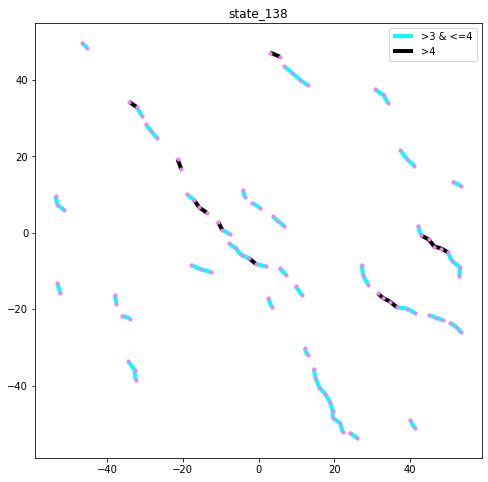

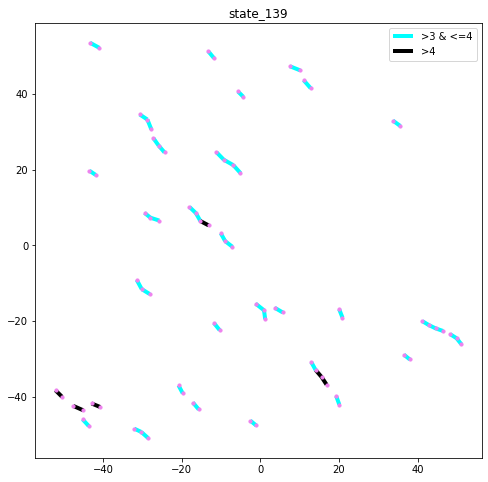

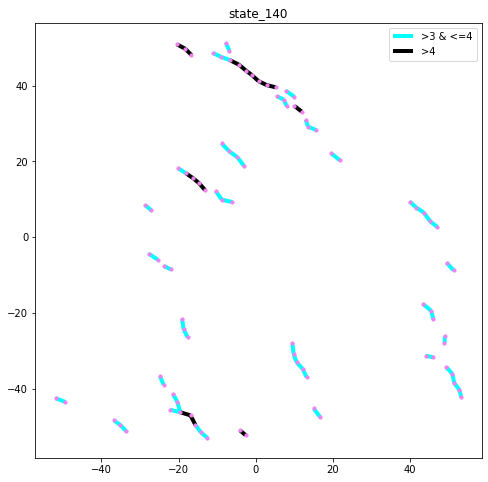

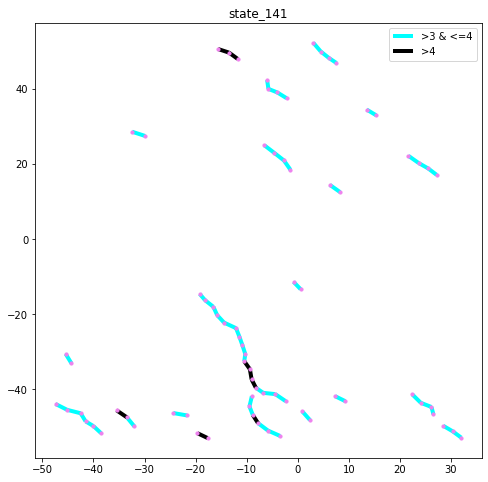

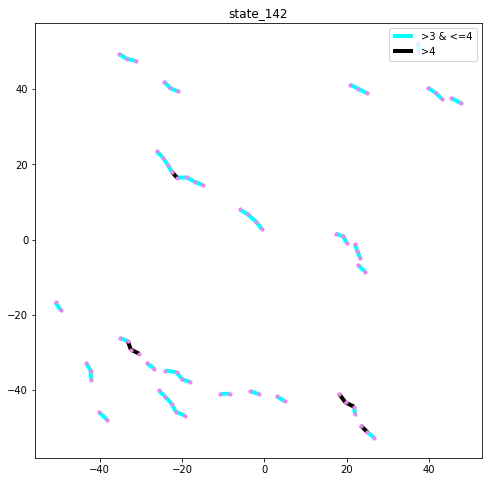

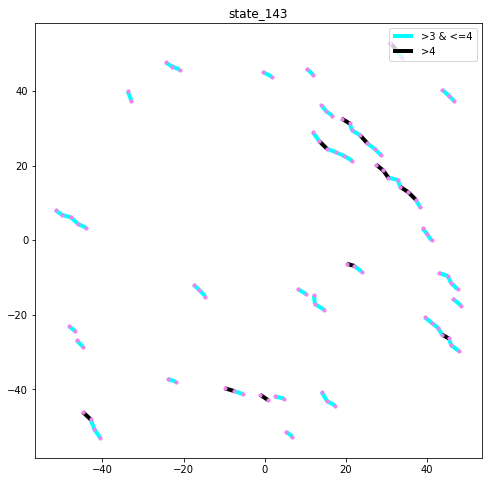

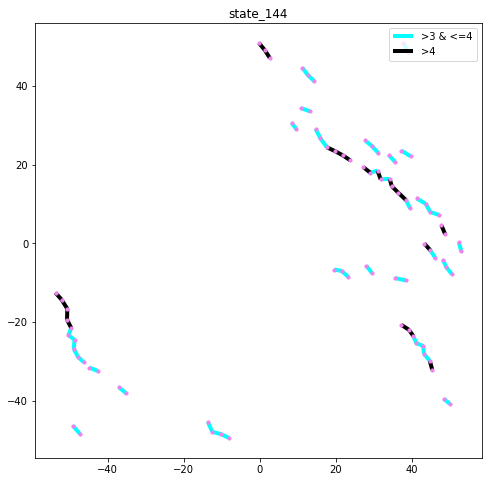

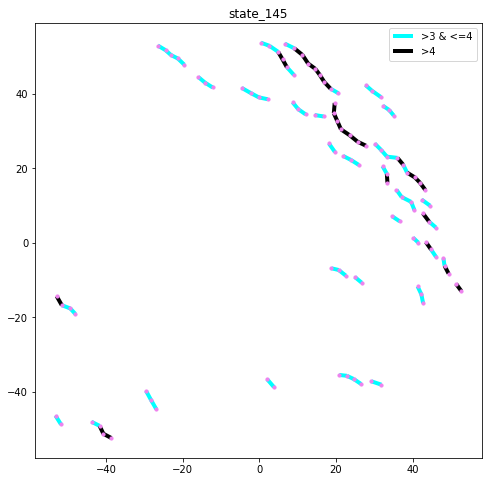

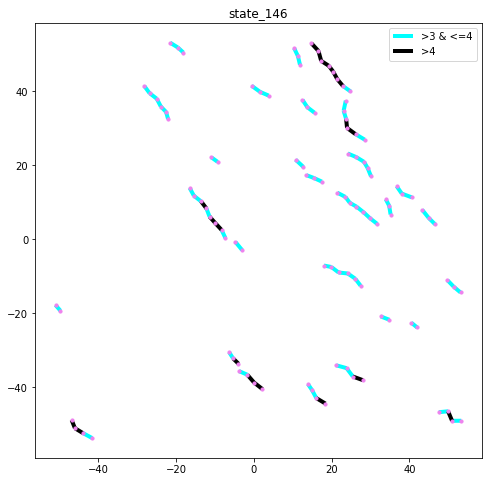

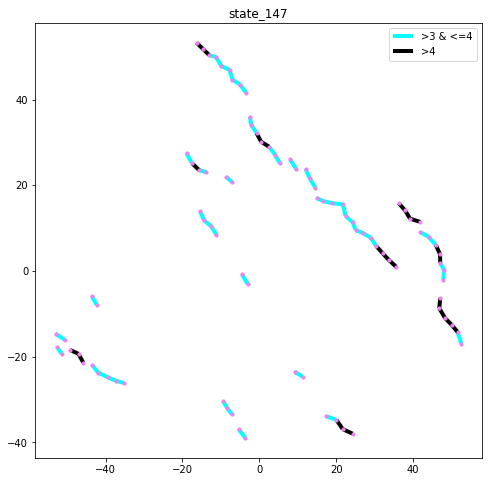

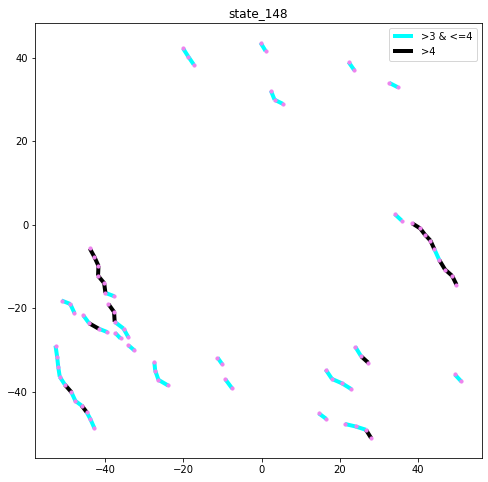

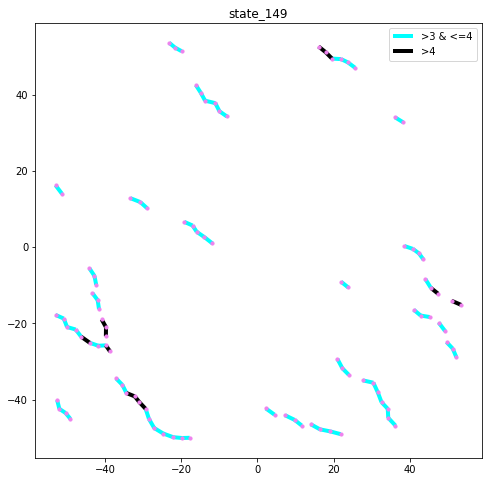

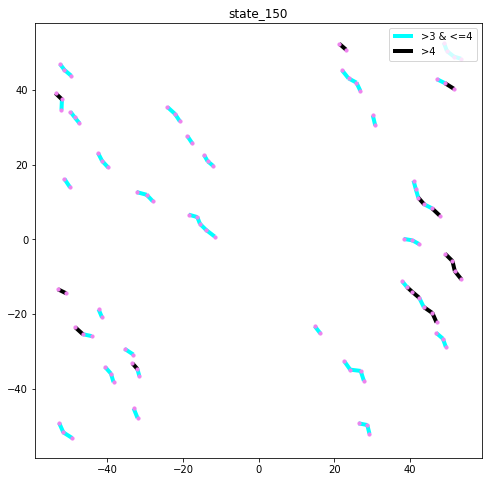

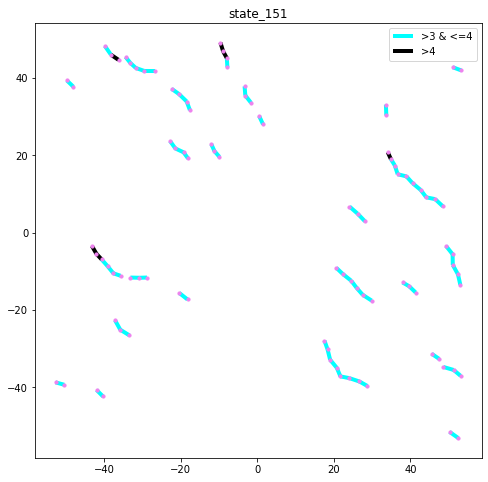

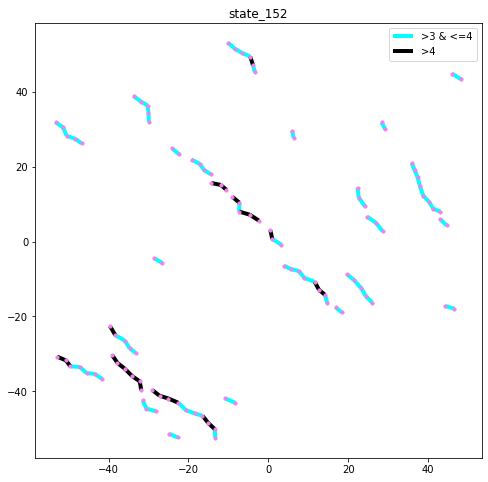

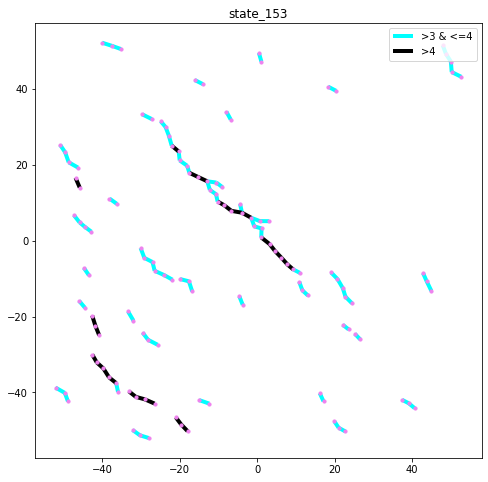

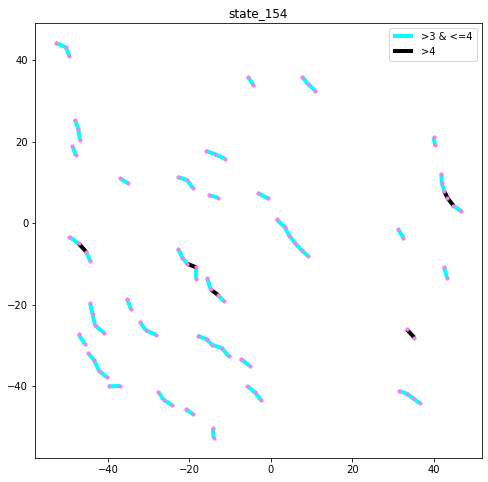

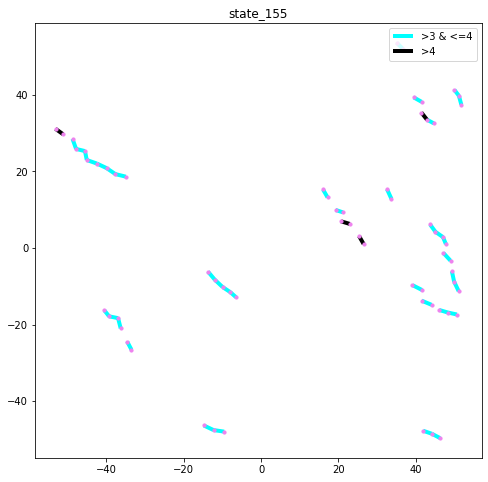

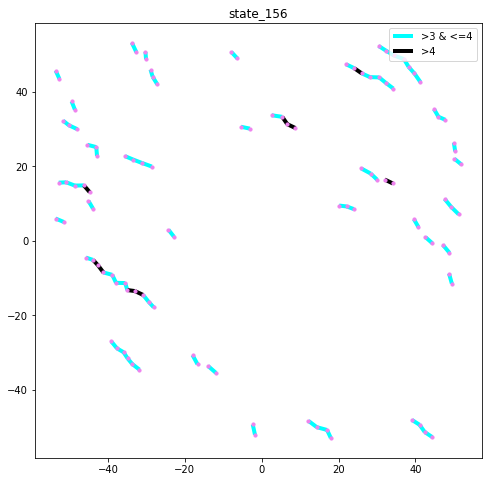

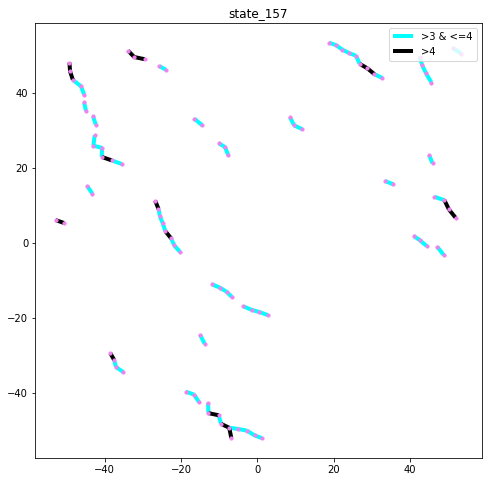

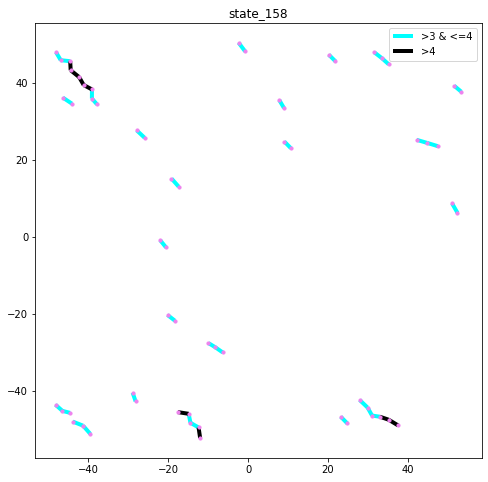

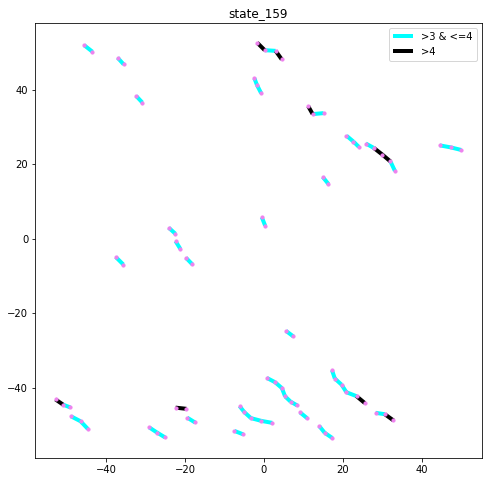

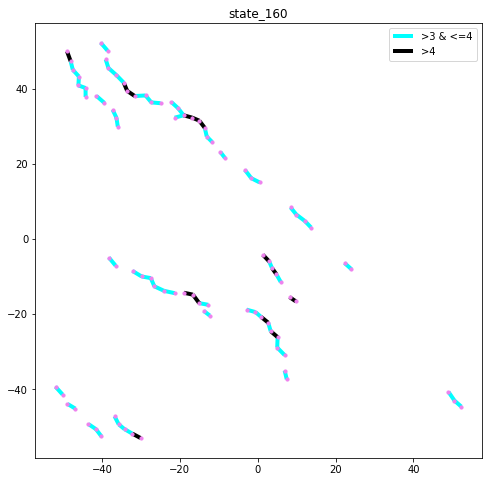

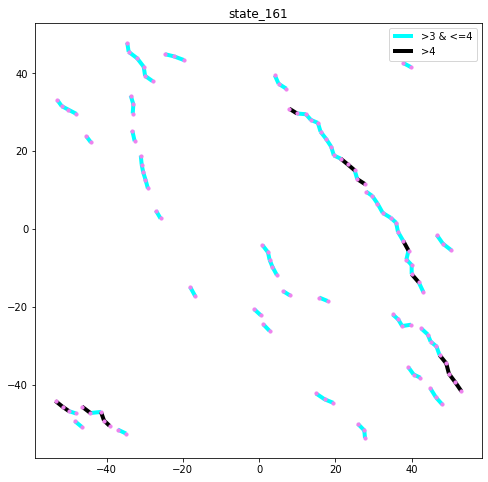

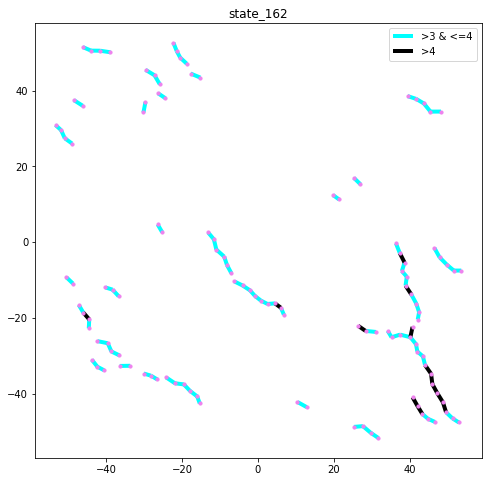

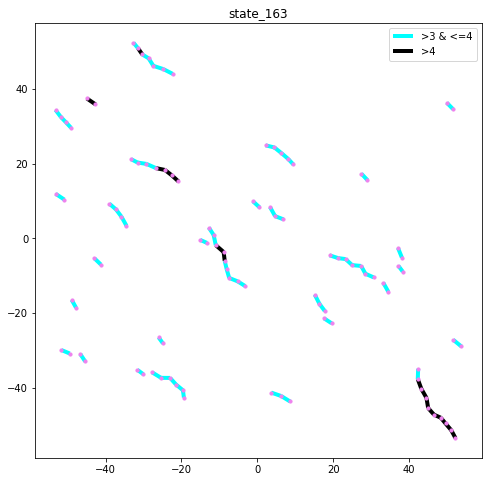

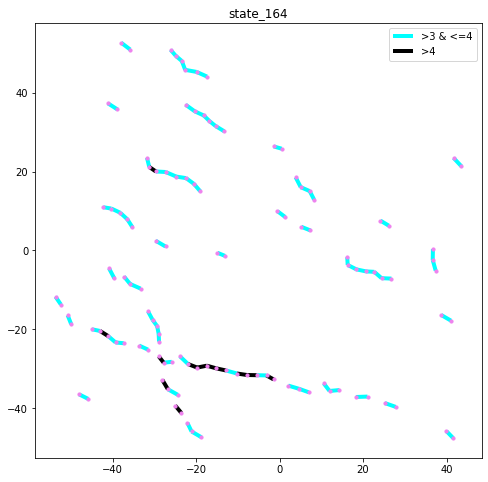

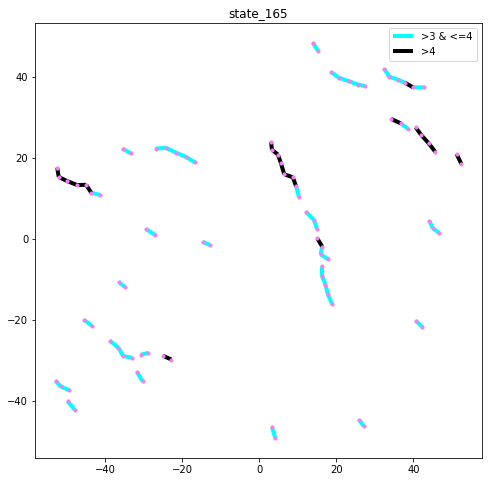

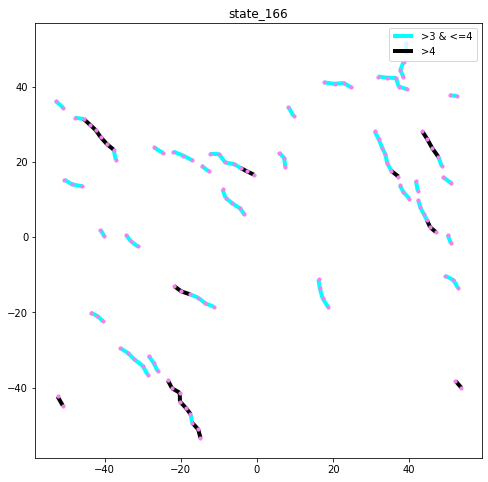

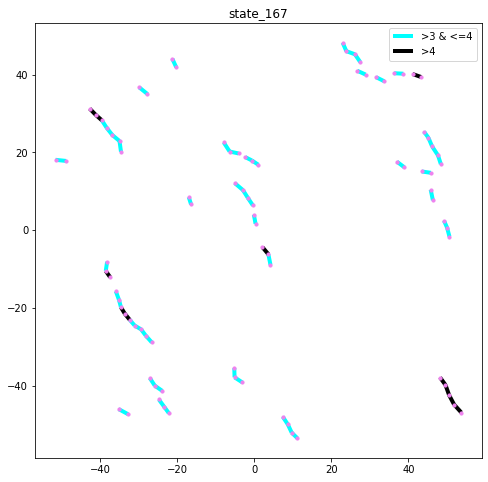

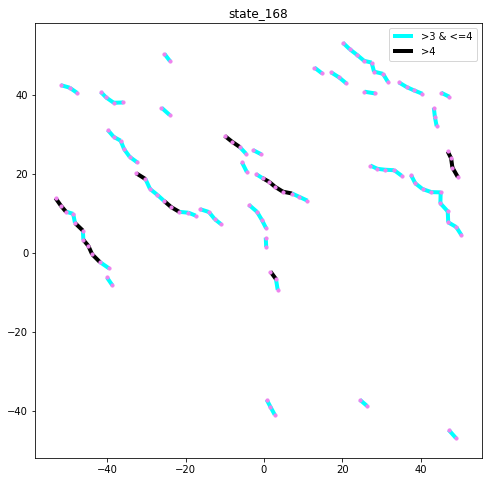

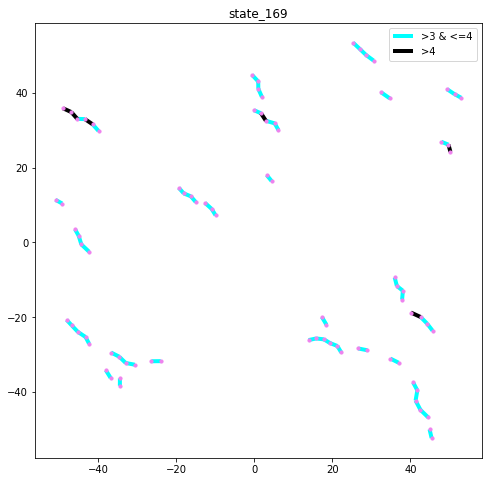

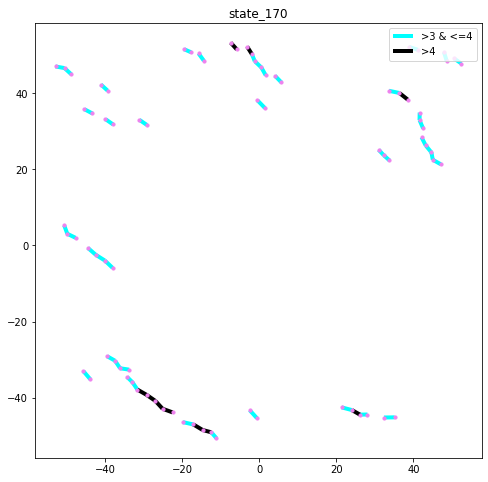

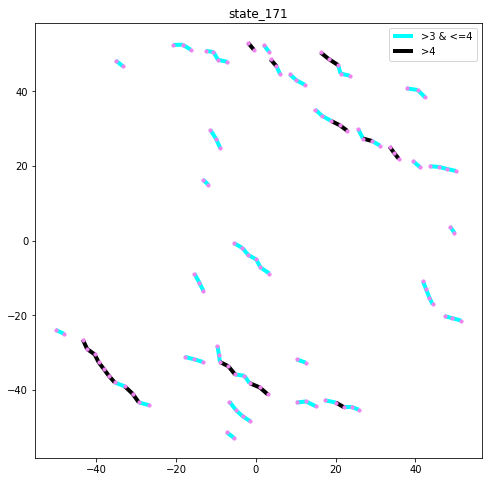

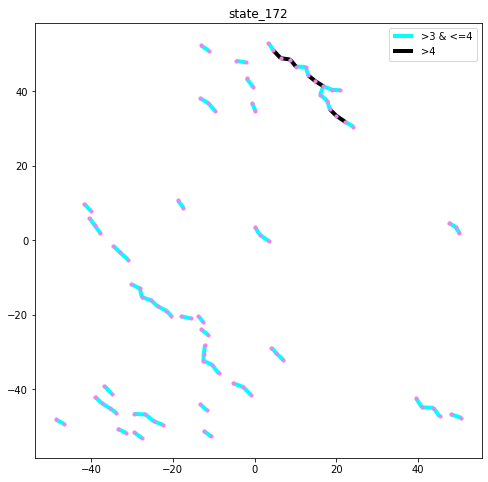

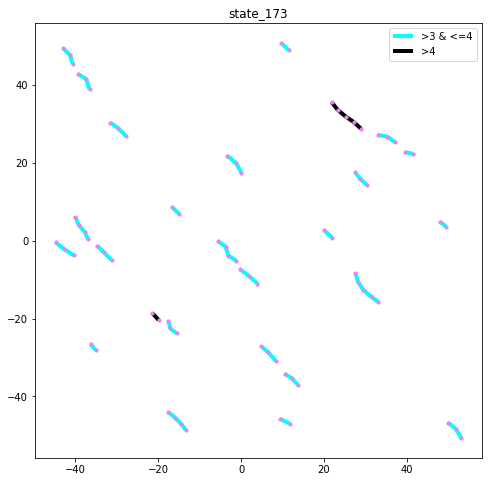

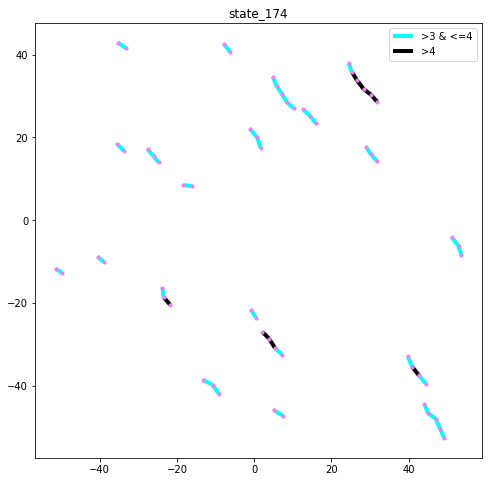

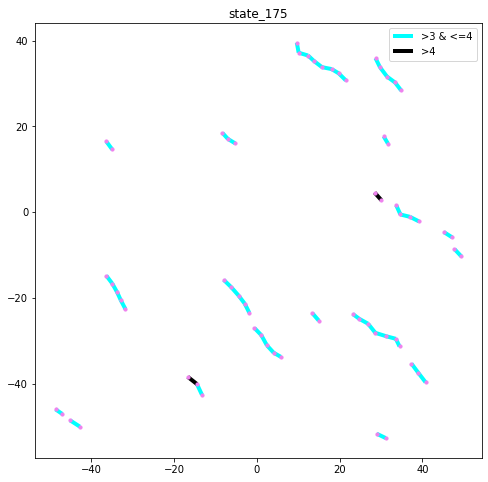

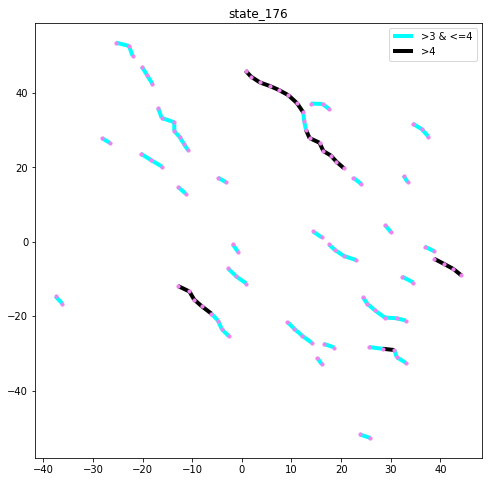

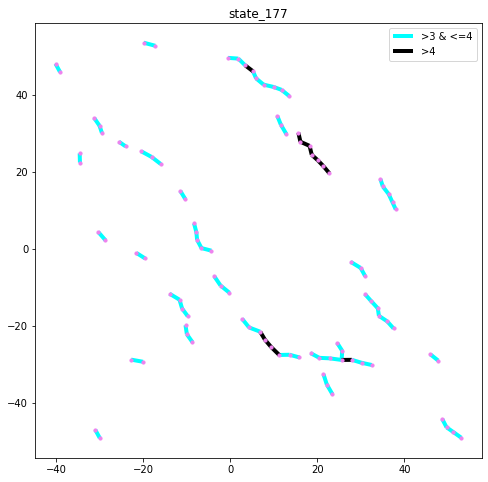

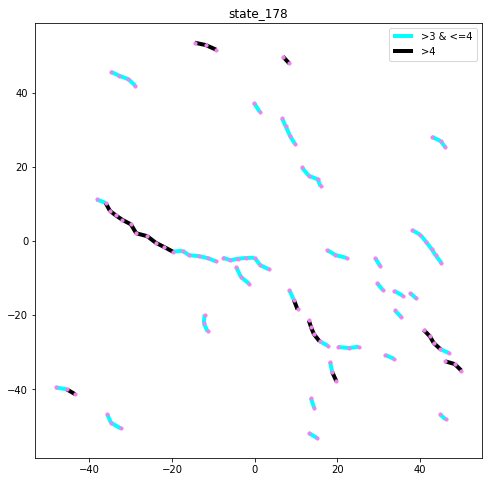

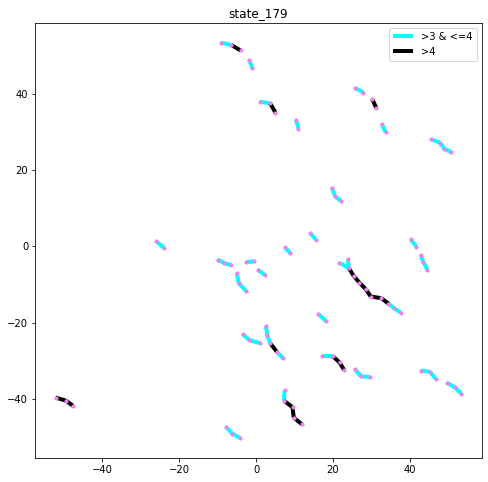

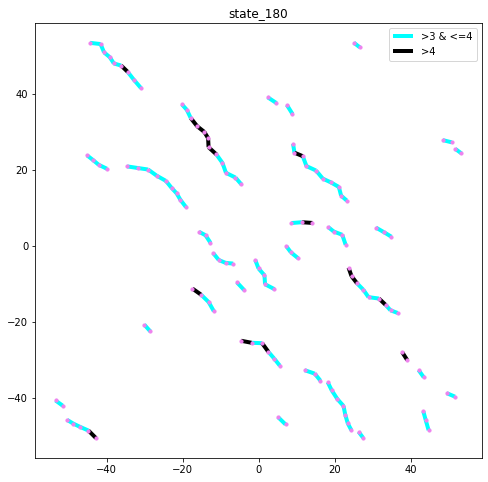

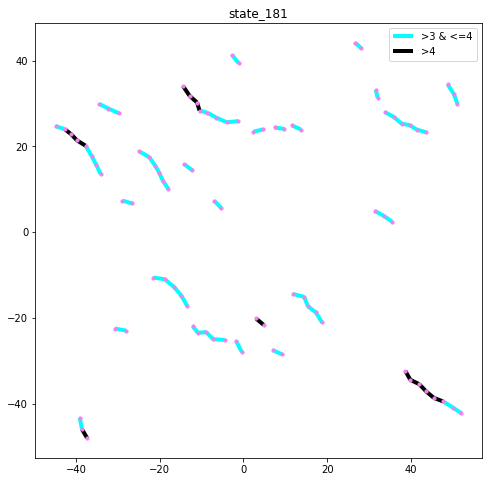

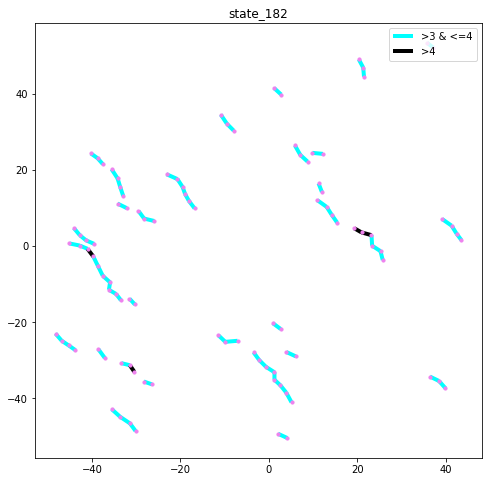

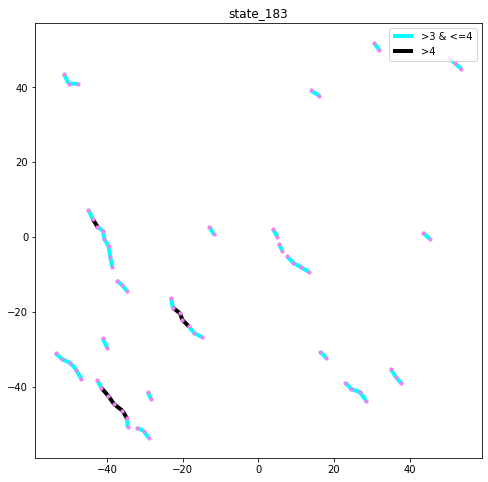

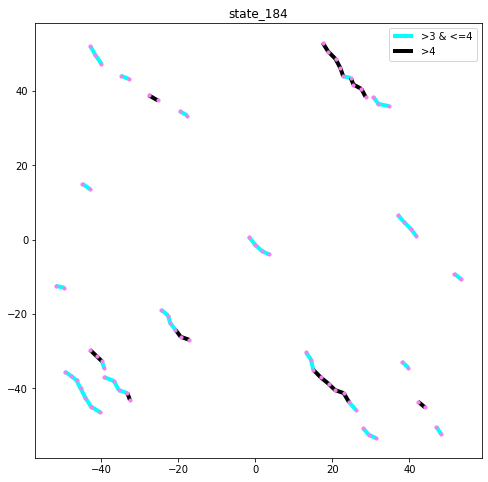

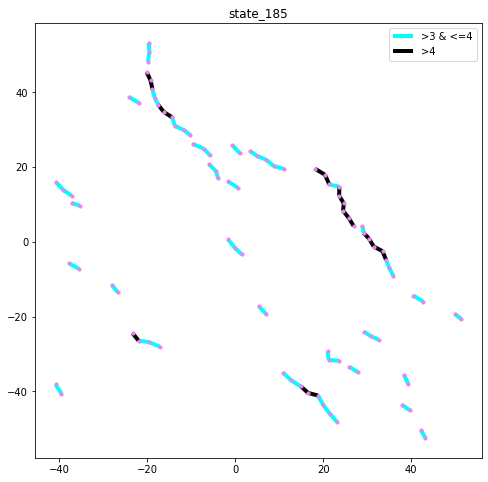

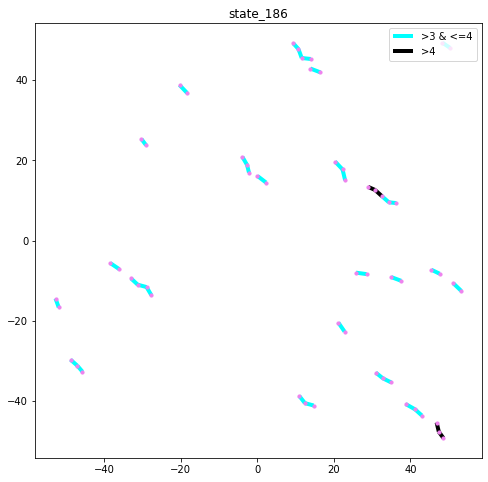

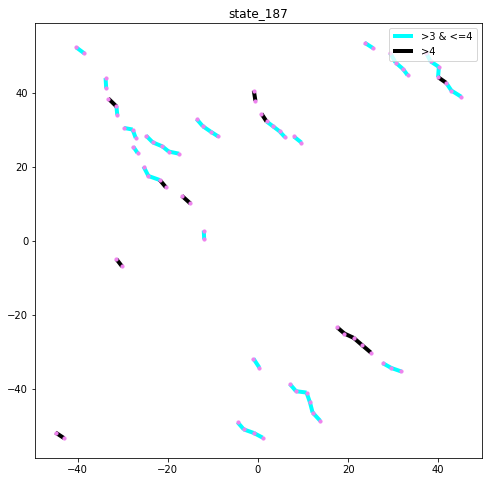

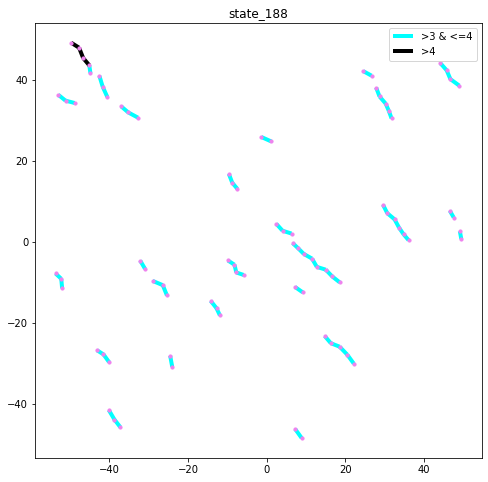

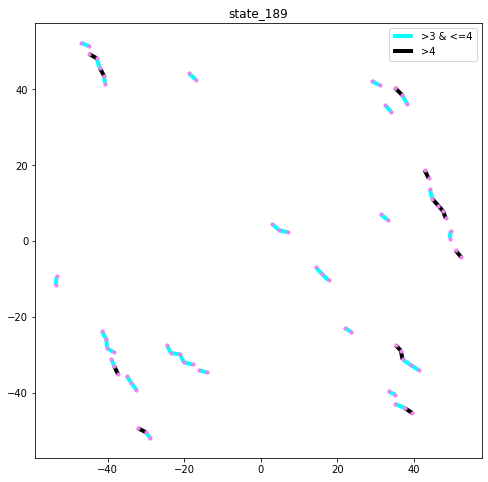

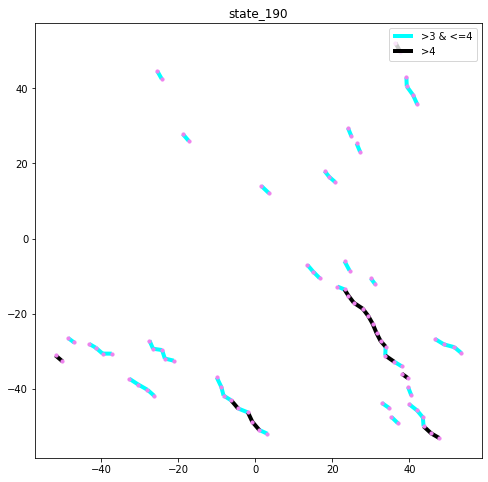

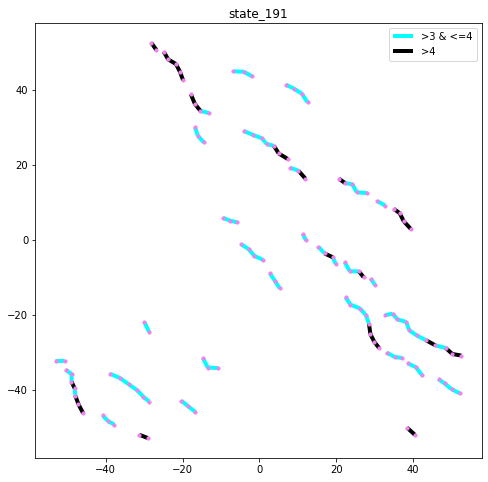

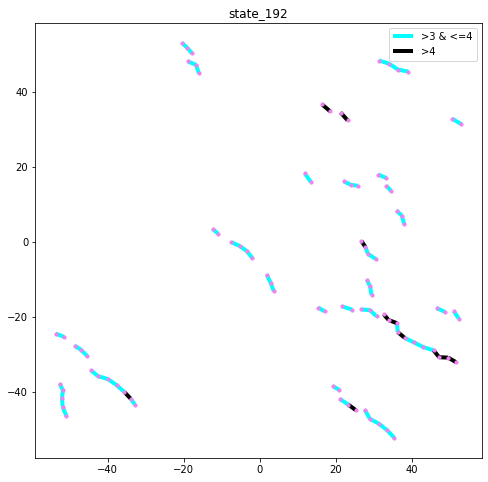

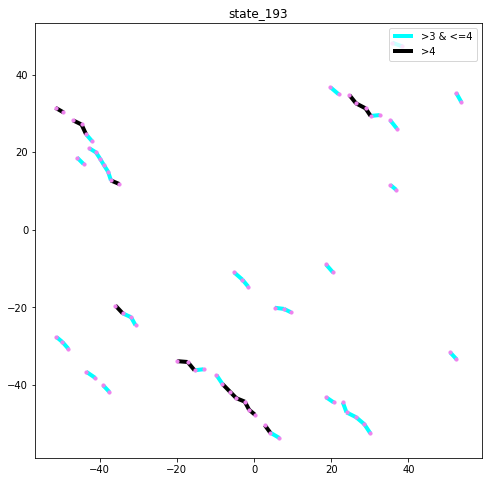

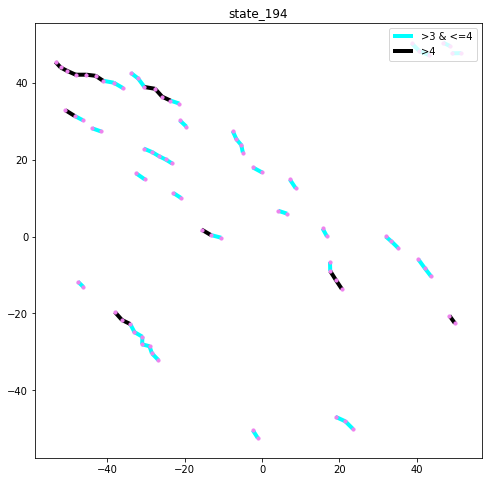

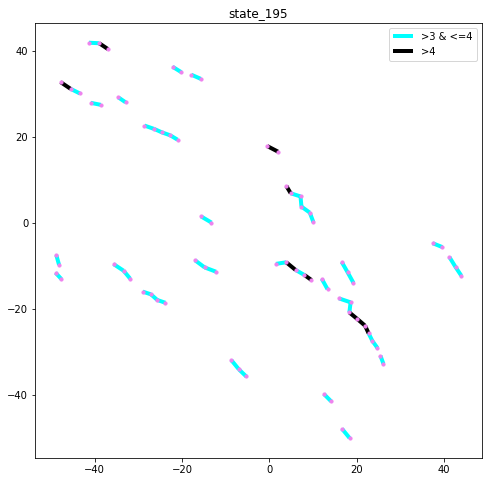

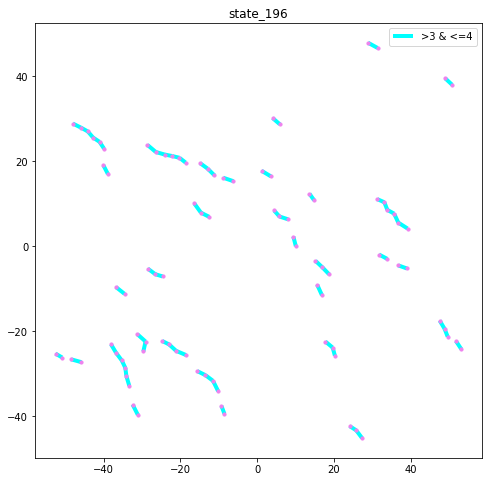

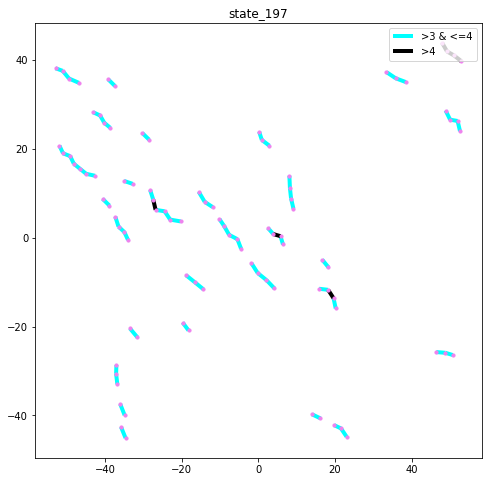

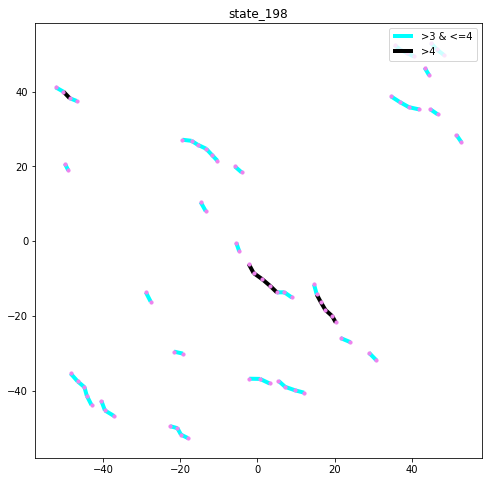

IndexError: index 867127 is out of bounds for axis 0 with size 867127

In [85]:
for idx in range(4,200):
    G = nx.Graph()
    index=[]
    for j in range(0,len(data)):
        if(data[j,0]==idx and data[j+1,0]==idx):
            index.append(j)
    ind=np.array(index)
    id_1=[]
    id_2=[]
    force=[]
    ss=[]
    position=[]
    position_1=[]
    position2=[]
    position_2=[]
    rad=[]
    rad2=[]
    dataaa=[]
    cond_force=[]
    s=[]
    for k in range(1,len(ind)):
        if(data[ind[k],3]>1):
            ss.append(ind[k])
    for i in range(0,len(ss)):
        if(data[ss[i],20]/100>0.0):
            position.append([data[ss[i],4],data[ss[i],6]])
            position2.append([data[ss[i],8],data[ss[i],10]])
            rad.append(data[ss[i],7])
            rad2.append(data[ss[i],11])
    for ii in range(0,len(rad)):
        if (data[ss[ii],20]/100>3.0):
            if (np.sqrt((position[ii][0]-position2[ii][0])**2+(position[ii][1]-position2[ii][1])**2))<35*(rad[ii]+rad2[ii]):
                id_1.append(str(int(data[ss[ii],1])))
                id_2.append(str(int(data[ss[ii],2])))
                force.append(data[ss[ii],20]/100)
                position_1.append([data[ss[ii],4],data[ss[ii],6]])
                position_2.append([data[ss[ii],8],data[ss[ii],10]])
    poss=(position_1+position_2)
    r_lis=(id_1+id_2)
    pos=get_dic_from_two_lists(r_lis,poss)
    for j in range(0,len(id_1)):
        G.add_edge(id_1[j], id_2[j], weight=force[j])
    #e_2=([(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.0 and d['weight'] <= 1.0 ])
    #e_3=[(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 1.0 and d['weight'] <= 2.0 ]
    #e_4=([(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 2.0 and d['weight'] <= 3.0])
    e_5=([(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 3.0 and d['weight']<=4.0])
    e_6= ([(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 4.0])
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    nx.draw(G,pos,node_size=10,node_color='violet')
    #nx.draw_networkx_edges(G, pos, edgelist=e_2,width=2, edge_color='green',alpha=1, label='>0 & <=1',with_labels=True)
    #nx.draw_networkx_edges(G, pos, edgelist=e_3,width=2, edge_color='blue',alpha=1, label='>1 & <=2',with_labels=True)
    #nx.draw_networkx_edges(G, pos, edgelist=e_4,width=2, edge_color='red',alpha=1, label='>2 & <=3',with_labels=True)
    nx.draw_networkx_edges(G, pos, edgelist=e_5,width=4, edge_color='aqua',alpha=1, label='>3 & <=4',with_labels=True)
    nx.draw_networkx_edges(G, pos, edgelist=e_6,width=4, edge_color='black',alpha=1, label='>4',with_labels=True)
    plt.axis('on')
    ax.legend(loc='upper right')
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    plt.title('state_'+str(idx))
    plt.savefig('force_network_above3/'+'forcenetwork_'+str(idx)+'.png')
    plt.show()

#nx.draw_networkx_nodes(G, pos, node_size=1,ax=ax)
#nx.draw_networkx_edges(G, pos, edge_color='red',alpha=1, label='1',with_labels=True)
#nx.draw_networkx_edges(G, pos)
#nx.draw_networkx_edges(G, pos,edgelist=e1, width=6, edge_color='blue',alpha=1, label='1',with_labels=True)
#nx.draw_networkx_edges(G, pos, edgelist=e_1, width=6, edge_color='blue',alpha=1, label='1',with_labels=True)
#nx.draw_networkx_edges(G, pos, edgelist=e_2, width=6, edge_color='green', alpha=1,label='2',with_labels=True)
